## Data Cleaning

In [19]:
import pandas as pd

In [20]:
#load the page level data and document level data for each document class (stored in different folders)
rel_page=pd.read_csv('Data/betadata-master/medical_records_release_form/pdf_text_by_page.csv',error_bad_lines=False,encoding='utf-8')
rel_page['class']='1'
rel_doc=pd.read_csv('Data/betadata-master/medical_records_release_form/pdf_text_by_file.csv',error_bad_lines=False,encoding='utf-8')
rel_doc['class']='1'
cons_page=pd.read_csv('Data/betadata-master/informed consent form/pdf_text_by_page.csv',error_bad_lines=False,encoding='utf-8')
cons_page['class']='2'
cons_doc=pd.read_csv('Data/betadata-master/informed consent form/pdf_text_by_file.csv',error_bad_lines=False,encoding='utf-8')
cons_doc['class']='2'
int_page=pd.read_csv('Data/betadata-master/patient intake form/pdf_text_by_page.csv',error_bad_lines=False,encoding='utf-8')
int_page['class']='3'
int_doc=pd.read_csv('Data/betadata-master/patient intake form/pdf_text_by_file.csv',error_bad_lines=False,encoding='utf-8')
int_doc['class']='3'
med_page=pd.read_csv('Data/betadata-master/medical form/pdf_text_by_page.csv',error_bad_lines=False,encoding='utf-8')
med_page['class']='4'
med_doc=pd.read_csv('Data/betadata-master/medical form/pdf_text_by_file.csv',error_bad_lines=False,encoding='utf-8')
med_doc['class']='4'
#print the dimensions
dataframes=[rel_page,rel_doc,cons_page,cons_doc,int_page,int_doc,med_page,med_doc]
for d in dataframes:
    print d.shape

(601, 8)
(306, 7)
(2135, 8)
(467, 7)
(2170, 8)
(488, 7)
(246, 8)
(87, 7)


In [21]:
#combine into one page-level dataframe and one document-level dataframe
doc_level=[rel_doc,cons_doc,int_doc,med_doc]
page_level=[rel_page,cons_page,int_page,med_page]
data_doc=pd.concat(doc_level)
data_page=pd.concat(page_level)
print data_doc.shape 
print data_page.shape 

(1348, 7)
(5152, 8)


In [22]:
#shuffle rows
data_doc = data_doc.sample(frac=1,random_state=3).reset_index(drop=True)
data_page= data_page.sample(frac=1,random_state=3).reset_index(drop=True)
print data_doc['class'].value_counts(normalize=True)
print data_doc['class'].value_counts()
print data_page['class'].value_counts(normalize=True)
print data_page['class'].value_counts()

3    0.362018
2    0.346439
1    0.227003
4    0.064540
Name: class, dtype: float64
3    488
2    467
1    306
4     87
Name: class, dtype: int64
3    0.421196
2    0.414402
1    0.116654
4    0.047748
Name: class, dtype: float64
3    2170
2    2135
1     601
4     246
Name: class, dtype: int64


In [23]:
#remove duplicates and NAs based on text content - expected to be a lot of these
data_doc=data_doc.drop_duplicates(subset=['text']).dropna(subset=['text'])
data_page=data_page.drop_duplicates(subset=['text']).dropna(subset=['text'])
#add an extra id column
data_doc['id'] = range(1, len(data_doc) + 1)
data_page['id'] = range(1, len(data_page) + 1)
print data_doc.shape
print data_page.shape

(951, 8)
(3630, 9)


In [24]:
print data_doc['class'].value_counts(normalize=True)
print data_doc['class'].value_counts()
print data_page['class'].value_counts(normalize=True)
print data_page['class'].value_counts()

1    0.311251
3    0.310200
2    0.292324
4    0.086225
Name: class, dtype: float64
1    296
3    295
2    278
4     82
Name: class, dtype: int64
2    0.415978
3    0.359504
1    0.159229
4    0.065289
Name: class, dtype: float64
2    1510
3    1305
1     578
4     237
Name: class, dtype: int64


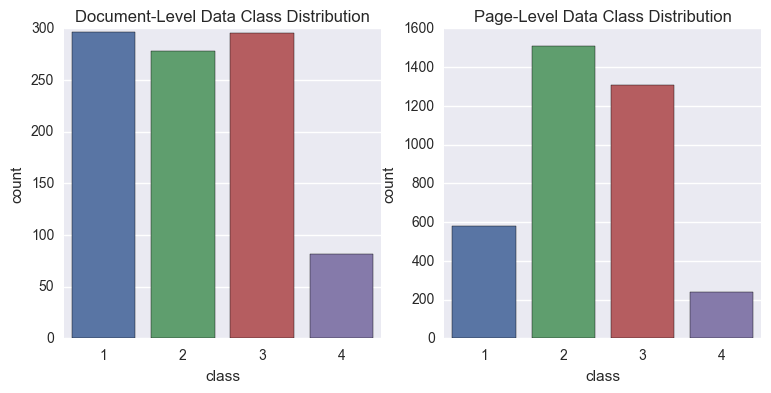

In [10]:
#plot class distributions
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1,2,figsize=(9,4))
i=0
for d in [data_doc,data_page]:
    plot=sns.countplot(x="class", data=d, order=['1','2','3','4'],ax=ax[i])
    if d.shape[1]==8:
        plot.set_title('Document-Level Data Class Distribution')
        i=i+1
    else:
        plot.set_title('Page-Level Data Class Distribution')
        i=i+1

In [25]:
# define X and y for each dataframe
Xd = data_doc.text
yd = data_doc['class']
Xp = data_page.text
yp = data_page['class']

## Tokenization

In [26]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer

vect = CountVectorizer(stop_words='english')
Xd_dtm=vect.fit_transform(Xd)
Xp_dtm=vect.fit_transform(Xp)
print Xd_dtm.shape
print Xp_dtm.shape

(951, 41354)
(3630, 40483)


In [27]:
#check for strange words
print vect.get_feature_names()[5900:12000]

[u'___ulcers', u'___unfulfilled', u'___unusual', u'___vaginal', u'___varicose', u'___vasectomy', u'___vegan', u'___vegetarian', u'___vision', u'___visual', u'___vivid', u'___vomiting', u'___wake', u'___waking', u'___walking', u'___washing', u'___water', u'___weak', u'___weakness', u'___weight', u'___wheezing', u'___women', u'___worrying', u'___x', u'___yeast', u'___yes', u'__abortions', u'__alcoholism', u'__allergies', u'__animals', u'__anxiety', u'__appendicitis', u'__arteriosclerosis', u'__arthritis', u'__artificial', u'__asthma', u'__bedwetting', u'__birth', u'__bleeding', u'__blood', u'__broken', u'__cancer', u'__chest', u'__chicken', u'__coffee', u'__constipation', u'__coordination', u'__date______________________', u'__decreased', u'__depression', u'__diabetes', u'__difficulty', u'__dizziness', u'__ear', u'__easily', u'__eating', u'__edema', u'__email', u'__emotional', u'__emphysema', u'__epilepsy', u'__eye', u'__fainting', u'__first_______________________last________________\u4e

In [28]:
#need to replace ____ with whitespace
data_doc['text']=data_doc['text'].apply(lambda x: x.replace("_"," "))
data_page['text']=data_page['text'].apply(lambda x: x.replace("_"," "))
Xd=Xd.apply(lambda x: x.replace("_"," "))
Xp=Xp.apply(lambda x: x.replace("_"," "))

In [29]:
#run CountVectorizer again
vect = CountVectorizer()
Xd_dtm=vect.fit_transform(Xd)
Xp_dtm=vect.fit_transform(Xp)
print Xd_dtm.shape
print Xp_dtm.shape
print vect.get_feature_names()[5900:12000]

(951, 38511)
(3630, 37712)
[u'animation', u'anindividual', u'aninformation', u'aninformed', u'aninvestigatormustinformtheirbiftheyintend', u'anit', u'ankle', u'ankles', u'ankylosing', u'ankylosis', u'anmed', u'ann', u'anna', u'annals', u'annas', u'anne', u'anniversary', u'annotated', u'annotations', u'announce', u'announced', u'announcements', u'announces', u'annoy', u'annoyed', u'annoying', u'annoys', u'annu', u'annual', u'annually', u'annualstatutes', u'ano', u'anomalies', u'anomaly', u'anon', u'anonymity', u'anonymization', u'anonymous', u'anonymously', u'anopportunitytoaskanyquestions', u'anorectices', u'anorexia', u'anoscopy', u'anot', u'anote', u'another', u'anotherstudy', u'anp', u'anprovide', u'anpualrrquorssuch', u'anr', u'anreosbtsiaem', u'ans', u'ansara', u'anselmo', u'ansometimes', u'answ', u'answe', u'answer', u'answercompletedby', u'answered', u'answeredwithina', u'answerfield', u'answergiventorequestorby', u'answerinatertiary', u'answering', u'answerisneededhelpsprioriti

In [30]:
#stemming
stemmer = SnowballStemmer('english')
def stem_function(x):
    words = TextBlob(x).words
    list_of_stems = [stemmer.stem(i) for i in words]
    return (" ").join(list_of_stems)

data_doc['stems'] = data_doc.text.apply(stem_function)
data_page['stems'] = data_page.text.apply(stem_function)

print 'done'

done


In [31]:
#implement CountVectorizer on stems
vect = CountVectorizer(stop_words='english')
Xd_dtm2=vect.fit_transform(data_doc['stems'])
Xp_dtm2=vect.fit_transform(data_page['stems'])
print Xd_dtm2.shape
print Xp_dtm2.shape

(951, 32220)
(3630, 31413)


In [223]:
#ngrams
vect = CountVectorizer(stop_words='english',ngram_range=(1, 2))
Xd_dtm3=vect.fit_transform(Xd)
Xp_dtm3=vect.fit_transform(Xp)
print Xd_dtm3.shape
print Xp_dtm3.shape
#only include terms that occur 3+ times
vect = CountVectorizer(stop_words='english',ngram_range=(1, 2),min_df=3)
Xd_dtm4=vect.fit_transform(Xd)
Xp_dtm4=vect.fit_transform(Xp)
print Xd_dtm4.shape
print Xp_dtm4.shape

(951, 375520)
(3630, 372306)
(951, 33220)
(3630, 42745)


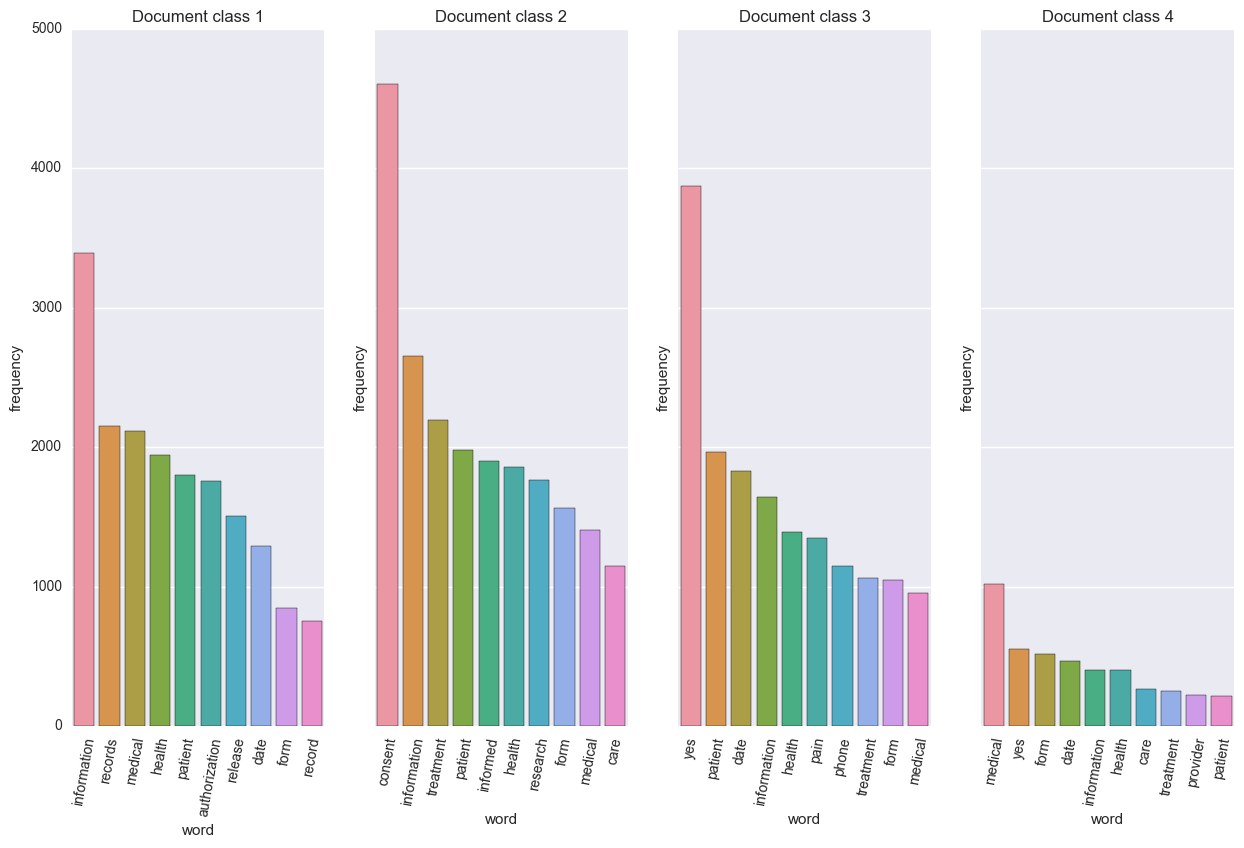

In [224]:
#histogram of 10 most common words in each class
vect = CountVectorizer(stop_words='english', max_features=1000)

def create_freq_vector(data,col,classval):
    data=data[data[col]==classval]
    dtm = vect.fit_transform(data['text'])
    freqs = [(word, dtm.getcol(idx).sum()) for word, idx in vect.vocabulary_.items()]
    #sort from largest to smallest
    freq_vector=pd.DataFrame(sorted(freqs, key = lambda x: -x[1]))
    freq_vector.columns=['word', 'frequency']
    freq_vector[col]=classval
    return freq_vector[0:10]

#document data plot
fig, ax = plt.subplots(1,4, sharey=True,figsize=(15,9))
i=0
for classval in ['1','2','3','4']:
    v=create_freq_vector(data_doc,'class',classval)
    b=sns.barplot('word', 'frequency', data=v, ax=ax[i]) 
    b.set_xticklabels(v['word'], rotation=80);
    b.set_ylabel('frequency')
    b.set_title('Document class '+classval)
    i=i+1



In [225]:
#correlations between 22 most common words
vect = CountVectorizer(stop_words='english', max_features=22)
dd=pd.DataFrame(vect.fit_transform(Xd).toarray(), columns=vect.get_feature_names())
dp=pd.DataFrame(vect.fit_transform(Xp).toarray(), columns=vect.get_feature_names())
dd.head()

address  authorization  care  consent  date  form  health  information  \
0        0              0     0        0     0     0       0            2   
1        0              0     1        2     0     1       1            0   
2        2              0     3        0     5     7       9            3   
3        0              0     1        9     3     2       0            2   
4       17              0     0       31     0    12       0            1   

   informed  medical ...   phone  records  release  research  signature  time  \
0         3        3 ...       0        0        0         0          2     0   
1         0        1 ...       0        0        0         0          0     0   
2         0        7 ...       3        2        0         0          5     2   
3         3        5 ...       0        1        0         0          2     1   
4         1        4 ...       0        0        0         3         26     3   

   treatment  understand  use  yes  
0          0           0    0    0  
1          2           2    0    0  
2          2           2    1    0  
3          0           1    0    0  
4          9          26    5    0  

[5 rows x 22 columns]

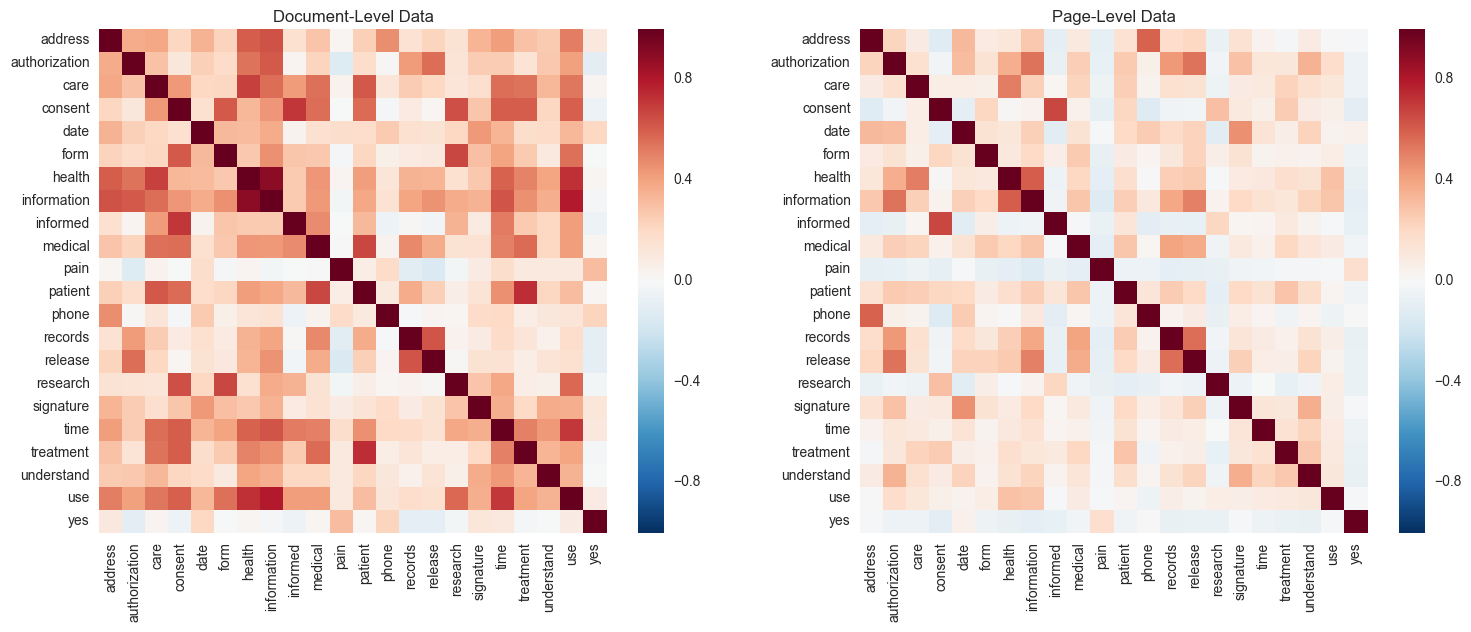

In [226]:
def corrplots(data):
    fig, ax = plt.subplots(1,2, figsize=(18,6.5))
    i=0
    for d in data:
        plot=sns.heatmap(d.corr(),ax=ax[i])
        if i==0:
            plot.set_title('Document-Level Data')
            i=i+1
        else:
            plot.set_title('Page-Level Data')
            i=i+1
corrplots([dd,dp])
#Interesting - not as many high correlations with page-level data


In [227]:
#TF-IDF - correlations between 22 most common words
vect = TfidfVectorizer(stop_words='english', max_features=22)
dd_2=pd.DataFrame(vect.fit_transform(Xd).toarray(), columns=vect.get_feature_names())
dp_2=pd.DataFrame(vect.fit_transform(Xp).toarray(), columns=vect.get_feature_names())
dd_2.head()

address  authorization      care   consent      date      form    health  \
0  0.000000            0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
1  0.000000            0.0  0.207648  0.480528  0.000000  0.170363  0.197369   
2  0.130907            0.0  0.201777  0.000000  0.248155  0.386275  0.575367   
3  0.000000            0.0  0.048031  0.500173  0.106326  0.078812  0.000000   
4  0.300755            0.0  0.000000  0.652085  0.000000  0.178983  0.000000   

   information  informed   medical ...      phone   records  release  \
0     0.293362  0.787561  0.444786 ...   0.000000  0.000000      0.0   
1     0.000000  0.000000  0.173494 ...   0.000000  0.000000      0.0   
2     0.166791  0.000000  0.393374 ...   0.216844  0.163296      0.0   
3     0.079405  0.213171  0.200652 ...   0.000000  0.058306      0.0   
4     0.015027  0.026895  0.060757 ...   0.000000  0.000000      0.0   

   research  signature      time  treatment  understand       use  yes  
0  0.000000   0.309601  0.000000   0.000000    0.000000  0.000000  0.0  
1  0.000000   0.000000  0.000000   0.400976    0.420557  0.000000  0.0  
2  0.000000   0.293374  0.134826   0.129880    0.136222  0.066272  0.0  
3  0.000000   0.083801  0.048140   0.000000    0.048639  0.000000  0.0  
4  0.112056   0.412340  0.054663   0.157974    0.478654  0.089564  0.0  

[5 rows x 22 columns]

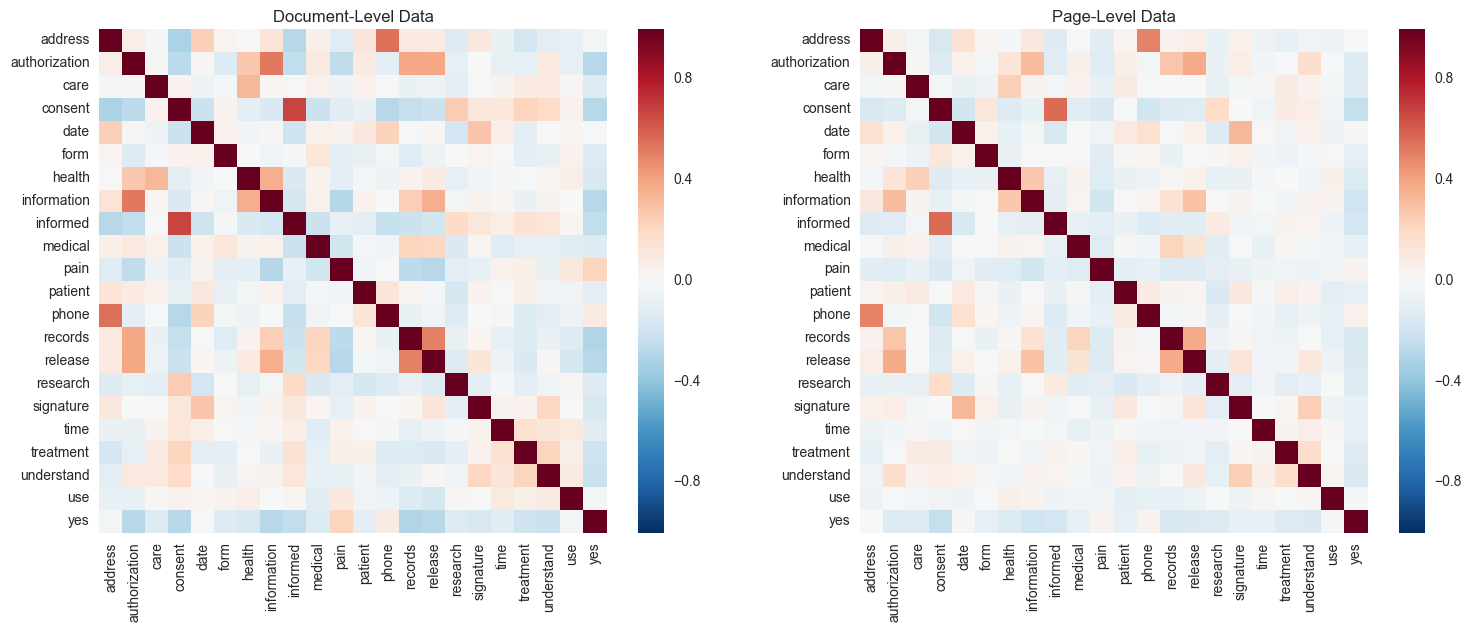

In [228]:
corrplots([dd_2,dp_2])
#page-level data looks more similar to document-level data


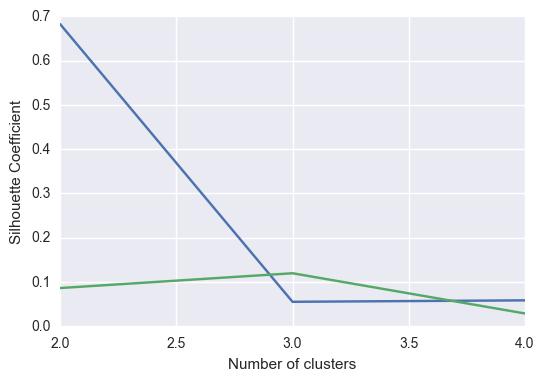

In [229]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
scaler = StandardScaler(with_mean=False)
vect = TfidfVectorizer(stop_words='english',max_features=10000)

#Cluster to see if there is inherent structure in the document-level data - try for 2, 3, 4 clusters. See is the clusters are similar to the classes
def fit_plot_clusters(k_range,data):
    def fitcluster(k,data):
        TfIdfm=vect.fit_transform(data)
        X=scaler.fit_transform(TfIdfm)  
        km = KMeans(n_clusters=k, random_state=1)
        kfit=km.fit(X)
        #Silhouette Coefficient for each k
        score=metrics.silhouette_score(X, km.labels_)
        return kfit, score

    kfits=[]
    scores = []

    for k in k_range:
        kfit,score=fitcluster(k,data)
        kfits.append(kfit)
        scores.append(score)

    plt.plot(k_range, scores)
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Coefficient')
    plt.grid(True)

#not good and gets worse as k increases
fit_plot_clusters([2,3,4],data_doc['text'])
#try with 3 classes
fit_plot_clusters([2,3,4],data_doc['text'][data_doc['class'] !='4'])

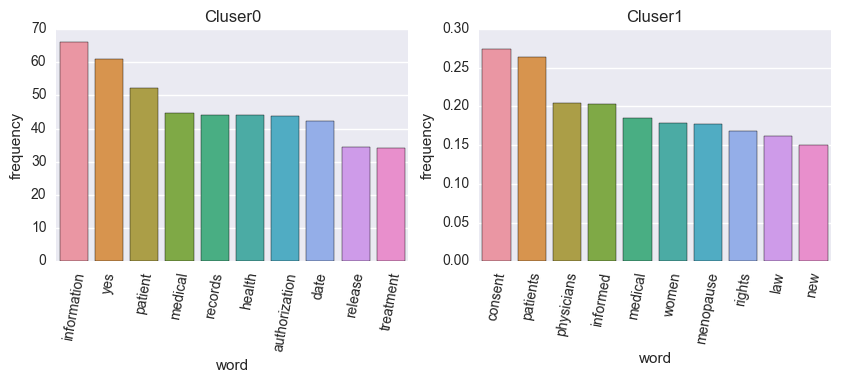

In [235]:
#most common words in each cluster (just showing for 2 clusters)
kfits=[]
scores = []
for k in [2,3,4]:
    kfit,score=fitcluster(k,data_doc['text'])
    kfits.append(kfit)
    scores.append(score)
    col=str(k)+'_cluster'
    data_doc[col]=kfit.labels_

fig, ax = plt.subplots(1,2, figsize=(10,3))
i=0
for k in [0,1]:
    v=create_freq_vector(data_doc,'2_cluster',k)
    b=sns.barplot('word', 'frequency', data=v, ax=ax[i]) 
    b.set_xticklabels(v['word'], rotation=80);
    b.set_ylabel('frequency')
    b.set_title('Cluser' +str(k))
    i=i+1

In [237]:
#class distribution by cluster - algotithm strongly prefers 1 (or 2) clusters, and doesn't seem to systematically detect the class except for perhaps 3 (intake forms)
for k in [2,3,4]:
    col=str(k)+'_cluster'
    print data_doc.groupby([col,'class']).size()


2_cluster  class
0          1        297
           2        276
           3        295
           4         82
1          2          1
dtype: int64
3_cluster  class
0          1        297
           2        276
           3        293
           4         82
1          2          1
2          3          2
dtype: int64
4_cluster  class
0          3         85
           4          1
1          1          1
2          2          1
3          1        296
           2        276
           3        210
           4         81
dtype: int64


In [246]:
#Look at document correlations using tf-idf matrix - see which classes of documents are correlated, and if the same classes are the most correlated
vect = TfidfVectorizer(stop_words='english',max_features=1000)
d_tfidf_matrix=pd.DataFrame(vect.fit_transform(Xd).toarray(), columns=vect.get_feature_names())
print d_tfidf_matrix.shape
d_corr_matrix=d_tfidf_matrix.dot(d_tfidf_matrix.transpose())
print d_corr_matrix.shape
d_corr_matrix.head()

(951, 1000)
(951, 951)


0         1         2         3         4         5         6    \
0  1.000000  0.076514  0.464677  0.107760  0.092770  0.004864  0.097670   
1  0.076514  1.000000  0.099775  0.182770  0.274514  0.016426  0.124547   
2  0.464677  0.099775  1.000000  0.074321  0.080744  0.017819  0.124916   
3  0.107760  0.182770  0.074321  1.000000  0.172385  0.012241  0.198697   
4  0.092770  0.274514  0.080744  0.172385  1.000000  0.014397  0.124812   

        7         8         9      ...          941       942       943  \
0  0.108693  0.059358  0.154430    ...     0.071342  0.062474  0.079132   
1  0.158114  0.140223  0.059748    ...     0.052576  0.021304  0.038097   
2  0.188263  0.122336  0.200617    ...     0.092995  0.119345  0.165431   
3  0.223757  0.160488  0.120790    ...     0.075817  0.043387  0.044593   
4  0.146589  0.141057  0.083331    ...     0.063683  0.077150  0.036296   

        944       945       946       947       948       949       950  
0  0.092217  0.130545  0.082755  0.151273  0.154176  0.124071  0.070067  
1  0.094956  0.104584  0.110694  0.091039  0.085043  0.077886  0.103605  
2  0.109981  0.121426  0.112402  0.166786  0.195798  0.123153  0.094809  
3  0.115006  0.106632  0.092739  0.143081  0.094351  0.203654  0.148253  
4  0.101110  0.049240  0.081376  0.116257  0.127691  0.125156  0.115100  

[5 rows x 951 columns]

In [249]:
#To get pairs with highest absolute correlation - adapted from stackoverflow:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(d_corr_matrix, 10))


Top Absolute Correlations
144  268    0.996550
489  768    0.995632
303  853    0.994865
627  916    0.989854
758  870    0.986869
457  714    0.983726
61   176    0.973503
148  322    0.967073
188  589    0.966668
522  730    0.957029
dtype: float64
(300, 1)


In [261]:
corr_pairs=pd.DataFrame(get_top_abs_correlations(d_corr_matrix, 500))
corr_pairs.reset_index(level=[0, 1],inplace=True)
#get the classes
corr_pairs.columns=['id1','id2','corr']
corr_pairs=pd.merge(left=corr_pairs,right=data_doc[['id','class']], left_on='id1', right_on='id')
corr_pairs=pd.merge(left=corr_pairs,right=data_doc[['id','class']], left_on='id2', right_on='id')
corr_pairs.head()
#All document classes correlate with class 1 (release form) the majority of the time, followed by class 3 (intake form)
corr_pairs.groupby(['class_x','class_y']).size()

class_x  class_y
1        1          67
         2          39
         3          71
         4           5
2        1          58
         2          34
         3          48
         4           5
3        1          55
         2          40
         3          45
         4           7
4        1           9
         2           7
         3           8
         4           2
dtype: int64

In [32]:
#try a basic model
from sklearn.naive_bayes import MultinomialNB
vect = TfidfVectorizer(stop_words='english',max_features=10000)
Xd_dtm = vect.fit_transform(data_doc['stems'])
Xp_dtm = vect.fit_transform(data_page['stems'])
nb = MultinomialNB()
fitd=nb.fit(Xd_dtm, yd)
fitp=nb.fit(Xp_dtm, yp)
print 'Document level data accuracy: '
print fitd.score(Xd_dtm, yd)
print 'Page level data accuracy: ' 
print fitp.score(Xp_dtm, yp)

Document level data accuracy: 
0.527865404837
Page level data accuracy: 
0.846556473829


In [11]:
#They don't do well with the 4th class there, seems like it's too similar to the other 3. Will try taking it out, or experimenting with other methods of classifying the 4th class
print confusion_matrix(yd,fitd.predict(Xd_dtm))
print confusion_matrix(yp,fitp.predict(Xp_dtm))

[[181  66  32  17]
 [ 29 118  36  95]
 [ 19  11 168  97]
 [  8  21  18  35]]
[[ 475   87   16    0]
 [   4 1449   57    0]
 [  10  148 1147    0]
 [   7  104  124    2]]


In [72]:
#import all necessary libraries
from time import time
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report as clsr
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np
#training sets
Xds=data_doc['stems']
Xps=data_page['stems']
#need 4 different train test splits: one for each level (document/page), one for each feature set (regular or stems)
Xd_train, Xd_test, yd_train, yd_test= train_test_split(Xd, yd, train_size=0.75, random_state=3)
Xds_train, Xds_test, yds_train, yds_test= train_test_split(Xds, yd, train_size=0.75, random_state=3)
Xp_train, Xp_test, yp_train, yp_test= train_test_split(Xp, yp, train_size=0.75, random_state=3)
Xps_train, Xps_test, yps_train, yps_test= train_test_split(Xps, yp, train_size=0.75, random_state=3)

## Document Level Data - all 4 classes left in

In [88]:
##########################Multinomial NB pipeline
X=[Xd_train, Xds_train]
text_clf_nb = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),('clf', MultinomialNB())])
#Set range of parameters
param_grid = {}
param_grid["vect__stop_words"]=[None,'english']
param_grid["vect__max_features"] = [10000,30000,35000]
param_grid["vect__ngram_range"] = [(1,1), (1,2)]
param_grid["vect__min_df"] = [1,3]
param_grid["clf__fit_prior"] = [False,True]
param_grid["clf__class_prior"] = [None,(0.25,0.25,0.25,0.25)]

grid = GridSearchCV(text_clf_nb, param_grid, cv=4, scoring='accuracy',verbose=5)

# for data in X:
#     grid.fit(data,yd)
#     print "                   "
#     print grid.best_estimator_
#     print "                   "

#stemming doesnt seem to make a difference:
grid.fit(Xd_train,yd_train)
print grid.best_estimator_
clf_nb=grid.best_estimator_

Fitting 4 folds for each of 96 candidates, totalling 384 fits
[CV] clf__class_prior=None, vect__ngram_range=(1, 1), clf__fit_prior=False, vect__min_df=1, vect__stop_words=None, vect__max_features=10000 
[CV]  clf__class_prior=None, vect__ngram_range=(1, 1), clf__fit_prior=False, vect__min_df=1, vect__stop_words=None, vect__max_features=10000, score=0.866667 -   1.6s
[CV] clf__class_prior=None, vect__ngram_range=(1, 1), clf__fit_prior=False, vect__min_df=1, vect__stop_words=None, vect__max_features=10000 
[CV]  clf__class_prior=None, vect__ngram_range=(1, 1), clf__fit_prior=False, vect__min_df=1, vect__stop_words=None, vect__max_features=10000, score=0.811111 -   1.3s
[CV] clf__class_prior=None, vect__ngram_range=(1, 1), clf__fit_prior=False, vect__min_df=1, vect__stop_words=None, vect__max_features=10000 
[CV]  clf__class_prior=None, vect__ngram_range=(1, 1), clf__fit_prior=False, vect__min_df=1, vect__stop_words=None, vect__max_features=10000, score=0.807910 -   1.2s
[CV] clf__class_p

[Parallel(n_jobs=1)]: Done  17 tasks       | elapsed:   42.8s


[CV]  clf__class_prior=None, vect__ngram_range=(1, 1), clf__fit_prior=False, vect__min_df=3, vect__stop_words=None, vect__max_features=10000, score=0.811111 -   1.3s
[CV] clf__class_prior=None, vect__ngram_range=(1, 1), clf__fit_prior=False, vect__min_df=3, vect__stop_words=None, vect__max_features=10000 
[CV]  clf__class_prior=None, vect__ngram_range=(1, 1), clf__fit_prior=False, vect__min_df=3, vect__stop_words=None, vect__max_features=10000, score=0.813559 -   1.4s
[CV] clf__class_prior=None, vect__ngram_range=(1, 1), clf__fit_prior=False, vect__min_df=3, vect__stop_words=None, vect__max_features=10000 
[CV]  clf__class_prior=None, vect__ngram_range=(1, 1), clf__fit_prior=False, vect__min_df=3, vect__stop_words=None, vect__max_features=10000, score=0.869318 -   1.3s
[CV] clf__class_prior=None, vect__ngram_range=(1, 1), clf__fit_prior=False, vect__min_df=3, vect__stop_words=english, vect__max_features=10000 
[CV]  clf__class_prior=None, vect__ngram_range=(1, 1), clf__fit_prior=False,

[Parallel(n_jobs=1)]: Done  71 tasks       | elapsed:  2.9min


[CV]  clf__class_prior=None, vect__ngram_range=(1, 1), clf__fit_prior=False, vect__min_df=1, vect__stop_words=english, vect__max_features=35000, score=0.829545 -   1.4s
[CV] clf__class_prior=None, vect__ngram_range=(1, 2), clf__fit_prior=False, vect__min_df=1, vect__stop_words=None, vect__max_features=35000 
[CV]  clf__class_prior=None, vect__ngram_range=(1, 2), clf__fit_prior=False, vect__min_df=1, vect__stop_words=None, vect__max_features=35000, score=0.866667 -   4.0s
[CV] clf__class_prior=None, vect__ngram_range=(1, 2), clf__fit_prior=False, vect__min_df=1, vect__stop_words=None, vect__max_features=35000 
[CV]  clf__class_prior=None, vect__ngram_range=(1, 2), clf__fit_prior=False, vect__min_df=1, vect__stop_words=None, vect__max_features=35000, score=0.833333 -   3.9s
[CV] clf__class_prior=None, vect__ngram_range=(1, 2), clf__fit_prior=False, vect__min_df=1, vect__stop_words=None, vect__max_features=35000 
[CV]  clf__class_prior=None, vect__ngram_range=(1, 2), clf__fit_prior=False,

[Parallel(n_jobs=1)]: Done 161 tasks       | elapsed: 13.2min


[CV]  clf__class_prior=None, vect__ngram_range=(1, 1), clf__fit_prior=True, vect__min_df=1, vect__stop_words=None, vect__max_features=35000, score=0.822222 -   4.3s
[CV] clf__class_prior=None, vect__ngram_range=(1, 1), clf__fit_prior=True, vect__min_df=1, vect__stop_words=None, vect__max_features=35000 
[CV]  clf__class_prior=None, vect__ngram_range=(1, 1), clf__fit_prior=True, vect__min_df=1, vect__stop_words=None, vect__max_features=35000, score=0.813559 -   4.2s
[CV] clf__class_prior=None, vect__ngram_range=(1, 1), clf__fit_prior=True, vect__min_df=1, vect__stop_words=None, vect__max_features=35000 
[CV]  clf__class_prior=None, vect__ngram_range=(1, 1), clf__fit_prior=True, vect__min_df=1, vect__stop_words=None, vect__max_features=35000, score=0.869318 -   5.0s
[CV] clf__class_prior=None, vect__ngram_range=(1, 1), clf__fit_prior=True, vect__min_df=1, vect__stop_words=english, vect__max_features=35000 
[CV]  clf__class_prior=None, vect__ngram_range=(1, 1), clf__fit_prior=True, vect__

[Parallel(n_jobs=1)]: Done 287 tasks       | elapsed: 20.6min


[CV]  clf__class_prior=(0.25, 0.25, 0.25, 0.25), vect__ngram_range=(1, 2), clf__fit_prior=False, vect__min_df=3, vect__stop_words=english, vect__max_features=35000, score=0.857955 -   3.3s
[CV] clf__class_prior=(0.25, 0.25, 0.25, 0.25), vect__ngram_range=(1, 1), clf__fit_prior=True, vect__min_df=1, vect__stop_words=None, vect__max_features=10000 
[CV]  clf__class_prior=(0.25, 0.25, 0.25, 0.25), vect__ngram_range=(1, 1), clf__fit_prior=True, vect__min_df=1, vect__stop_words=None, vect__max_features=10000, score=0.866667 -   1.4s
[CV] clf__class_prior=(0.25, 0.25, 0.25, 0.25), vect__ngram_range=(1, 1), clf__fit_prior=True, vect__min_df=1, vect__stop_words=None, vect__max_features=10000 
[CV]  clf__class_prior=(0.25, 0.25, 0.25, 0.25), vect__ngram_range=(1, 1), clf__fit_prior=True, vect__min_df=1, vect__stop_words=None, vect__max_features=10000, score=0.811111 -   1.4s
[CV] clf__class_prior=(0.25, 0.25, 0.25, 0.25), vect__ngram_range=(1, 1), clf__fit_prior=True, vect__min_df=1, vect__stop

[Parallel(n_jobs=1)]: Done 384 out of 384 | elapsed: 24.8min finished


Pipeline(steps=[('vect', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=30000, min_df=3,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        s...alse,
         use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=False))])


In [89]:
print "training data:"
print confusion_matrix(yd_train,clf_nb.predict(Xd_train))
print clsr(yd_train,clf_nb.predict(Xd_train))
print "testing data"
print confusion_matrix(yd_test,clf_nb.predict(Xd_test))
print clsr(yd_test,clf_nb.predict(Xd_test))

training data:
[[224   0   2   0]
 [  6 191   5   0]
 [  5   0 217   0]
 [ 27  10  26   0]]
             precision    recall  f1-score   support

          1       0.85      0.99      0.92       226
          2       0.95      0.95      0.95       202
          3       0.87      0.98      0.92       222
          4       0.00      0.00      0.00        63

avg / total       0.81      0.89      0.85       713

testing data
[[69  1  0  0]
 [ 2 68  6  0]
 [ 2  3 68  0]
 [ 7  3  9  0]]
             precision    recall  f1-score   support

          1       0.86      0.99      0.92        70
          2       0.91      0.89      0.90        76
          3       0.82      0.93      0.87        73
          4       0.00      0.00      0.00        19

avg / total       0.79      0.86      0.83       238



In [36]:
##########################SVM pipeline
text_clf_svm = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),('clf', SGDClassifier(loss='hinge',random_state=42))])
#Set range of parameters
param_grid_svm = {}
param_grid_svm["vect__stop_words"]=[None,'english']
param_grid_svm["vect__max_features"] = [10000,30000,35000]
param_grid_svm["vect__ngram_range"] = [(1,1), (1,2)]
param_grid_svm["vect__min_df"] = [1,3]
param_grid_svm["clf__alpha"]=[1e-3, .0075]
param_grid_svm["clf__class_weight"]=['balanced',None]
param_grid_svm["clf__n_iter"]=[5,10]


gridsvm = GridSearchCV(text_clf_svm, param_grid_svm, cv=4, scoring='accuracy',verbose=5)

gridsvm.fit(Xd_train,yd_train)
print gridsvm.best_estimator_
clf_svm=gridsvm.best_estimator_

Fitting 4 folds for each of 192 candidates, totalling 768 fits
[CV] vect__ngram_range=(1, 1), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=10000, clf__alpha=0.001 
[CV]  vect__ngram_range=(1, 1), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=10000, clf__alpha=0.001, score=0.944444 -   1.5s
[CV] vect__ngram_range=(1, 1), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=10000, clf__alpha=0.001 
[CV]  vect__ngram_range=(1, 1), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=10000, clf__alpha=0.001, score=0.911111 -   1.3s
[CV] vect__ngram_range=(1, 1), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=10000, clf__alpha=0.001 
[CV]  vect__ngram_range=(1, 1), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weigh

[Parallel(n_jobs=1)]: Done  17 tasks       | elapsed:   42.6s


[CV]  vect__ngram_range=(1, 1), clf__n_iter=5, vect__min_df=3, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=10000, clf__alpha=0.001, score=0.916667 -   2.2s
[CV] vect__ngram_range=(1, 1), clf__n_iter=5, vect__min_df=3, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=10000, clf__alpha=0.001 
[CV]  vect__ngram_range=(1, 1), clf__n_iter=5, vect__min_df=3, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=10000, clf__alpha=0.001, score=0.932203 -   2.3s
[CV] vect__ngram_range=(1, 1), clf__n_iter=5, vect__min_df=3, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=10000, clf__alpha=0.001 
[CV]  vect__ngram_range=(1, 1), clf__n_iter=5, vect__min_df=3, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=10000, clf__alpha=0.001, score=0.954545 -   2.0s
[CV] vect__ngram_range=(1, 1), clf__n_iter=5, vect__min_df=3, vect__stop_words=english, clf__class_weight=balanced, vect__max_features=10000

[Parallel(n_jobs=1)]: Done  71 tasks       | elapsed:  3.1min


[CV]  vect__ngram_range=(1, 1), clf__n_iter=5, vect__min_df=1, vect__stop_words=english, clf__class_weight=balanced, vect__max_features=35000, clf__alpha=0.001, score=0.926136 -   1.3s
[CV] vect__ngram_range=(1, 2), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=35000, clf__alpha=0.001 
[CV]  vect__ngram_range=(1, 2), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=35000, clf__alpha=0.001, score=0.950000 -   4.4s
[CV] vect__ngram_range=(1, 2), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=35000, clf__alpha=0.001 
[CV]  vect__ngram_range=(1, 2), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=35000, clf__alpha=0.001, score=0.922222 -   4.1s
[CV] vect__ngram_range=(1, 2), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=35000

[Parallel(n_jobs=1)]: Done 161 tasks       | elapsed:  7.2min


[CV]  vect__ngram_range=(1, 1), clf__n_iter=10, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=35000, clf__alpha=0.001, score=0.938889 -   1.3s
[CV] vect__ngram_range=(1, 1), clf__n_iter=10, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=35000, clf__alpha=0.001 
[CV]  vect__ngram_range=(1, 1), clf__n_iter=10, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=35000, clf__alpha=0.001, score=0.937853 -   1.3s
[CV] vect__ngram_range=(1, 1), clf__n_iter=10, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=35000, clf__alpha=0.001 
[CV]  vect__ngram_range=(1, 1), clf__n_iter=10, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=35000, clf__alpha=0.001, score=0.937500 -   1.3s
[CV] vect__ngram_range=(1, 1), clf__n_iter=10, vect__min_df=1, vect__stop_words=english, clf__class_weight=balanced, vect__max_features

[Parallel(n_jobs=1)]: Done 287 tasks       | elapsed: 12.9min


[CV]  vect__ngram_range=(1, 2), clf__n_iter=5, vect__min_df=3, vect__stop_words=english, clf__class_weight=None, vect__max_features=35000, clf__alpha=0.001, score=0.931818 -   3.2s
[CV] vect__ngram_range=(1, 1), clf__n_iter=10, vect__min_df=1, vect__stop_words=None, clf__class_weight=None, vect__max_features=10000, clf__alpha=0.001 
[CV]  vect__ngram_range=(1, 1), clf__n_iter=10, vect__min_df=1, vect__stop_words=None, clf__class_weight=None, vect__max_features=10000, clf__alpha=0.001, score=0.966667 -   1.3s
[CV] vect__ngram_range=(1, 1), clf__n_iter=10, vect__min_df=1, vect__stop_words=None, clf__class_weight=None, vect__max_features=10000, clf__alpha=0.001 
[CV]  vect__ngram_range=(1, 1), clf__n_iter=10, vect__min_df=1, vect__stop_words=None, clf__class_weight=None, vect__max_features=10000, clf__alpha=0.001, score=0.933333 -   1.3s
[CV] vect__ngram_range=(1, 1), clf__n_iter=10, vect__min_df=1, vect__stop_words=None, clf__class_weight=None, vect__max_features=10000, clf__alpha=0.001 

[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed: 19.8min


[CV]  vect__ngram_range=(1, 1), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=35000, clf__alpha=0.0075, score=0.888889 -   1.3s
[CV] vect__ngram_range=(1, 1), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=35000, clf__alpha=0.0075 
[CV]  vect__ngram_range=(1, 1), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=35000, clf__alpha=0.0075, score=0.920904 -   1.3s
[CV] vect__ngram_range=(1, 1), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=35000, clf__alpha=0.0075 
[CV]  vect__ngram_range=(1, 1), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=35000, clf__alpha=0.0075, score=0.897727 -   1.3s
[CV] vect__ngram_range=(1, 1), clf__n_iter=5, vect__min_df=1, vect__stop_words=english, clf__class_weight=balanced, vect__max_features=

[Parallel(n_jobs=1)]: Done 647 tasks       | elapsed: 28.2min


[CV]  vect__ngram_range=(1, 1), clf__n_iter=5, vect__min_df=1, vect__stop_words=english, clf__class_weight=None, vect__max_features=35000, clf__alpha=0.0075, score=0.880682 -   1.3s
[CV] vect__ngram_range=(1, 2), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=None, vect__max_features=35000, clf__alpha=0.0075 
[CV]  vect__ngram_range=(1, 2), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=None, vect__max_features=35000, clf__alpha=0.0075, score=0.877778 -   4.2s
[CV] vect__ngram_range=(1, 2), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=None, vect__max_features=35000, clf__alpha=0.0075 
[CV]  vect__ngram_range=(1, 2), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=None, vect__max_features=35000, clf__alpha=0.0075, score=0.850000 -   3.9s
[CV] vect__ngram_range=(1, 2), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=None, vect__max_features=35000, clf__alpha=0.0075

[Parallel(n_jobs=1)]: Done 768 out of 768 | elapsed: 33.5min finished


Pipeline(steps=[('vect', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=10000, min_df=3,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
    ...     penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False))])


In [37]:
print clf_svm.get_params()

{'clf__warm_start': False, 'clf__shuffle': True, 'clf__verbose': 0, 'tfidf__use_idf': True, 'clf__random_state': 42, 'clf__power_t': 0.5, 'clf__n_jobs': 1, 'clf__penalty': 'l2', 'clf__alpha': 0.001, 'vect__analyzer': u'word', 'clf__l1_ratio': 0.15, 'tfidf__smooth_idf': True, 'tfidf__sublinear_tf': False, 'vect__max_df': 1.0, 'clf': SGDClassifier(alpha=0.001, average=False, class_weight='balanced',
       epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False), 'clf__n_iter': 5, 'vect__lowercase': True, 'vect__binary': False, 'vect__stop_words': 'english', 'vect__encoding': u'utf-8', 'vect__max_features': 10000, 'vect__dtype': <type 'numpy.int64'>, 'clf__average': False, 'vect__strip_accents': None, 'clf__learning_rate': 'optimal', 'steps': [('vect', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',

In [38]:
print "training data:"
print confusion_matrix(yd_train,clf_svm.predict(Xd_train))
print clsr(yd_train,clf_svm.predict(Xd_train))
print "testing data"
print confusion_matrix(yd_test,clf_svm.predict(Xd_test))
print clsr(yd_test,clf_svm.predict(Xd_test))

training data:
[[224   2   0   0]
 [  0 201   1   0]
 [  0   0 222   0]
 [  0   0   0  63]]
             precision    recall  f1-score   support

          1       1.00      0.99      1.00       226
          2       0.99      1.00      0.99       202
          3       1.00      1.00      1.00       222
          4       1.00      1.00      1.00        63

avg / total       1.00      1.00      1.00       713

testing data
[[65  0  0  5]
 [ 0 72  4  0]
 [ 0  3 69  1]
 [ 1  3  2 13]]
             precision    recall  f1-score   support

          1       0.98      0.93      0.96        70
          2       0.92      0.95      0.94        76
          3       0.92      0.95      0.93        73
          4       0.68      0.68      0.68        19

avg / total       0.92      0.92      0.92       238



In [47]:
#further optimizing SVM model - didnt help on testing data!
#Set range of parameters
param_grid_svm_d = {}
param_grid_svm_d["vect__stop_words"]=[None,'english']
param_grid_svm_d["vect__max_features"] = [6000,10000,20000]
param_grid_svm_d["vect__ngram_range"] = [(1,2),(1,3)]
param_grid_svm_d["vect__min_df"] = [1,3]
param_grid_svm_d["clf__alpha"]=[0.0005,1e-3, .003]
param_grid_svm_d["clf__class_weight"]=['balanced']
param_grid_svm_d["clf__n_iter"]=[5,7]


gridsvm_d = GridSearchCV(text_clf_svm, param_grid_svm_d, cv=4, scoring='accuracy',verbose=5)

gridsvm_d.fit(Xd_train,yd_train)
print gridsvm_d.best_estimator_
clf_svm_d=gridsvm_d.best_estimator_

Fitting 4 folds for each of 144 candidates, totalling 576 fits
[CV] vect__ngram_range=(1, 2), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=6000, clf__alpha=0.0005 
[CV]  vect__ngram_range=(1, 2), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=6000, clf__alpha=0.0005, score=0.944444 -  18.2s
[CV] vect__ngram_range=(1, 2), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=6000, clf__alpha=0.0005 
[CV]  vect__ngram_range=(1, 2), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=6000, clf__alpha=0.0005, score=0.927778 -   3.9s
[CV] vect__ngram_range=(1, 2), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=6000, clf__alpha=0.0005 
[CV]  vect__ngram_range=(1, 2), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weigh

[Parallel(n_jobs=1)]: Done  17 tasks       | elapsed:  1.8min


[CV]  vect__ngram_range=(1, 2), clf__n_iter=5, vect__min_df=3, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=6000, clf__alpha=0.0005, score=0.916667 -   3.7s
[CV] vect__ngram_range=(1, 2), clf__n_iter=5, vect__min_df=3, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=6000, clf__alpha=0.0005 
[CV]  vect__ngram_range=(1, 2), clf__n_iter=5, vect__min_df=3, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=6000, clf__alpha=0.0005, score=0.954802 -   3.9s
[CV] vect__ngram_range=(1, 2), clf__n_iter=5, vect__min_df=3, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=6000, clf__alpha=0.0005 
[CV]  vect__ngram_range=(1, 2), clf__n_iter=5, vect__min_df=3, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=6000, clf__alpha=0.0005, score=0.948864 -   3.9s
[CV] vect__ngram_range=(1, 2), clf__n_iter=5, vect__min_df=3, vect__stop_words=english, clf__class_weight=balanced, vect__max_features=6000,

[Parallel(n_jobs=1)]: Done  71 tasks       | elapsed:  7.1min


[CV]  vect__ngram_range=(1, 2), clf__n_iter=5, vect__min_df=1, vect__stop_words=english, clf__class_weight=balanced, vect__max_features=20000, clf__alpha=0.0005, score=0.943182 -   3.9s
[CV] vect__ngram_range=(1, 3), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=20000, clf__alpha=0.0005 
[CV]  vect__ngram_range=(1, 3), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=20000, clf__alpha=0.0005, score=0.961111 -   9.1s
[CV] vect__ngram_range=(1, 3), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=20000, clf__alpha=0.0005 
[CV]  vect__ngram_range=(1, 3), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=20000, clf__alpha=0.0005, score=0.916667 -   8.0s
[CV] vect__ngram_range=(1, 3), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=

[Parallel(n_jobs=1)]: Done 161 tasks       | elapsed: 15.9min


[CV]  vect__ngram_range=(1, 2), clf__n_iter=7, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=20000, clf__alpha=0.0005, score=0.933333 -   4.2s
[CV] vect__ngram_range=(1, 2), clf__n_iter=7, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=20000, clf__alpha=0.0005 
[CV]  vect__ngram_range=(1, 2), clf__n_iter=7, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=20000, clf__alpha=0.0005, score=0.937853 -   4.1s
[CV] vect__ngram_range=(1, 2), clf__n_iter=7, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=20000, clf__alpha=0.0005 
[CV]  vect__ngram_range=(1, 2), clf__n_iter=7, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=20000, clf__alpha=0.0005, score=0.948864 -   4.0s
[CV] vect__ngram_range=(1, 2), clf__n_iter=7, vect__min_df=1, vect__stop_words=english, clf__class_weight=balanced, vect__max_features=

[Parallel(n_jobs=1)]: Done 287 tasks       | elapsed: 27.7min


[CV]  vect__ngram_range=(1, 3), clf__n_iter=5, vect__min_df=3, vect__stop_words=english, clf__class_weight=balanced, vect__max_features=20000, clf__alpha=0.001, score=0.943182 -   6.0s
[CV] vect__ngram_range=(1, 2), clf__n_iter=7, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=6000, clf__alpha=0.001 
[CV]  vect__ngram_range=(1, 2), clf__n_iter=7, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=6000, clf__alpha=0.001, score=0.950000 -   3.9s
[CV] vect__ngram_range=(1, 2), clf__n_iter=7, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=6000, clf__alpha=0.001 
[CV]  vect__ngram_range=(1, 2), clf__n_iter=7, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=6000, clf__alpha=0.001, score=0.944444 -   3.8s
[CV] vect__ngram_range=(1, 2), clf__n_iter=7, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=6000, clf

[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed: 42.9min


[CV]  vect__ngram_range=(1, 2), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=20000, clf__alpha=0.003, score=0.905556 -   3.9s
[CV] vect__ngram_range=(1, 2), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=20000, clf__alpha=0.003 
[CV]  vect__ngram_range=(1, 2), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=20000, clf__alpha=0.003, score=0.926554 -   3.9s
[CV] vect__ngram_range=(1, 2), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=20000, clf__alpha=0.003 
[CV]  vect__ngram_range=(1, 2), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=20000, clf__alpha=0.003, score=0.914773 -   3.9s
[CV] vect__ngram_range=(1, 2), clf__n_iter=5, vect__min_df=1, vect__stop_words=english, clf__class_weight=balanced, vect__max_features=20000

[Parallel(n_jobs=1)]: Done 576 out of 576 | elapsed: 54.6min finished


Pipeline(steps=[('vect', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=20000, min_df=1,
        ngram_range=(1, 3), preprocessor=None, stop_words='english',
    ...     penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False))])


In [49]:
print clf_svm_d.get_params()

{'clf__warm_start': False, 'clf__shuffle': True, 'clf__verbose': 0, 'tfidf__use_idf': True, 'clf__random_state': 42, 'clf__power_t': 0.5, 'clf__n_jobs': 1, 'clf__penalty': 'l2', 'clf__alpha': 0.0005, 'vect__analyzer': u'word', 'clf__l1_ratio': 0.15, 'tfidf__smooth_idf': True, 'tfidf__sublinear_tf': False, 'vect__max_df': 1.0, 'clf': SGDClassifier(alpha=0.0005, average=False, class_weight='balanced',
       epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False), 'clf__n_iter': 5, 'vect__lowercase': True, 'vect__binary': False, 'vect__stop_words': 'english', 'vect__encoding': u'utf-8', 'vect__max_features': 20000, 'vect__dtype': <type 'numpy.int64'>, 'clf__average': False, 'vect__strip_accents': None, 'clf__learning_rate': 'optimal', 'steps': [('vect', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict

In [48]:
print "training data:"
print confusion_matrix(yd_train,clf_svm_d.predict(Xd_train))
print clsr(yd_train,clf_svm_d.predict(Xd_train))
print "testing data"
print confusion_matrix(yd_test,clf_svm_d.predict(Xd_test))
print clsr(yd_test,clf_svm_d.predict(Xd_test))

training data:
[[225   1   0   0]
 [  0 202   0   0]
 [  0   0 222   0]
 [  0   0   0  63]]
             precision    recall  f1-score   support

          1       1.00      1.00      1.00       226
          2       1.00      1.00      1.00       202
          3       1.00      1.00      1.00       222
          4       1.00      1.00      1.00        63

avg / total       1.00      1.00      1.00       713

testing data
[[64  0  0  6]
 [ 1 71  4  0]
 [ 0  3 69  1]
 [ 1  3  3 12]]
             precision    recall  f1-score   support

          1       0.97      0.91      0.94        70
          2       0.92      0.93      0.93        76
          3       0.91      0.95      0.93        73
          4       0.63      0.63      0.63        19

avg / total       0.91      0.91      0.91       238



In [50]:
#fit the better grid to stems - performs slightly worse
gridsvm_d.fit(Xds_train,yds_train)
print gridsvm_d.best_estimator_
clf_svm_ds=gridsvm_d.best_estimator_

Fitting 4 folds for each of 144 candidates, totalling 576 fits
[CV] vect__ngram_range=(1, 2), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=6000, clf__alpha=0.0005 
[CV]  vect__ngram_range=(1, 2), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=6000, clf__alpha=0.0005, score=0.955556 -   5.1s
[CV] vect__ngram_range=(1, 2), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=6000, clf__alpha=0.0005 
[CV]  vect__ngram_range=(1, 2), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=6000, clf__alpha=0.0005, score=0.938889 -   3.4s
[CV] vect__ngram_range=(1, 2), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=6000, clf__alpha=0.0005 
[CV]  vect__ngram_range=(1, 2), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weigh

[Parallel(n_jobs=1)]: Done  17 tasks       | elapsed:  1.4min


[CV]  vect__ngram_range=(1, 2), clf__n_iter=5, vect__min_df=3, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=6000, clf__alpha=0.0005, score=0.911111 -   3.2s
[CV] vect__ngram_range=(1, 2), clf__n_iter=5, vect__min_df=3, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=6000, clf__alpha=0.0005 
[CV]  vect__ngram_range=(1, 2), clf__n_iter=5, vect__min_df=3, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=6000, clf__alpha=0.0005, score=0.937853 -   3.2s
[CV] vect__ngram_range=(1, 2), clf__n_iter=5, vect__min_df=3, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=6000, clf__alpha=0.0005 
[CV]  vect__ngram_range=(1, 2), clf__n_iter=5, vect__min_df=3, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=6000, clf__alpha=0.0005, score=0.937500 -   3.2s
[CV] vect__ngram_range=(1, 2), clf__n_iter=5, vect__min_df=3, vect__stop_words=english, clf__class_weight=balanced, vect__max_features=6000,

[Parallel(n_jobs=1)]: Done  71 tasks       | elapsed:  5.5min


[CV]  vect__ngram_range=(1, 2), clf__n_iter=5, vect__min_df=1, vect__stop_words=english, clf__class_weight=balanced, vect__max_features=20000, clf__alpha=0.0005, score=0.943182 -   2.6s
[CV] vect__ngram_range=(1, 3), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=20000, clf__alpha=0.0005 
[CV]  vect__ngram_range=(1, 3), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=20000, clf__alpha=0.0005, score=0.950000 -   8.3s
[CV] vect__ngram_range=(1, 3), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=20000, clf__alpha=0.0005 
[CV]  vect__ngram_range=(1, 3), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=20000, clf__alpha=0.0005, score=0.927778 -   7.6s
[CV] vect__ngram_range=(1, 3), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=

[Parallel(n_jobs=1)]: Done 161 tasks       | elapsed: 13.4min


[CV]  vect__ngram_range=(1, 2), clf__n_iter=7, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=20000, clf__alpha=0.0005, score=0.916667 -   4.0s
[CV] vect__ngram_range=(1, 2), clf__n_iter=7, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=20000, clf__alpha=0.0005 
[CV]  vect__ngram_range=(1, 2), clf__n_iter=7, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=20000, clf__alpha=0.0005, score=0.943503 -   3.4s
[CV] vect__ngram_range=(1, 2), clf__n_iter=7, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=20000, clf__alpha=0.0005 
[CV]  vect__ngram_range=(1, 2), clf__n_iter=7, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=20000, clf__alpha=0.0005, score=0.931818 -   3.6s
[CV] vect__ngram_range=(1, 2), clf__n_iter=7, vect__min_df=1, vect__stop_words=english, clf__class_weight=balanced, vect__max_features=

[Parallel(n_jobs=1)]: Done 287 tasks       | elapsed: 23.5min


[CV]  vect__ngram_range=(1, 3), clf__n_iter=5, vect__min_df=3, vect__stop_words=english, clf__class_weight=balanced, vect__max_features=20000, clf__alpha=0.001, score=0.937500 -   5.2s
[CV] vect__ngram_range=(1, 2), clf__n_iter=7, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=6000, clf__alpha=0.001 
[CV]  vect__ngram_range=(1, 2), clf__n_iter=7, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=6000, clf__alpha=0.001, score=0.955556 -   3.1s
[CV] vect__ngram_range=(1, 2), clf__n_iter=7, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=6000, clf__alpha=0.001 
[CV]  vect__ngram_range=(1, 2), clf__n_iter=7, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=6000, clf__alpha=0.001, score=0.938889 -   3.1s
[CV] vect__ngram_range=(1, 2), clf__n_iter=7, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=6000, clf

[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed: 42.2min


[CV]  vect__ngram_range=(1, 2), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=20000, clf__alpha=0.003, score=0.916667 -   3.1s
[CV] vect__ngram_range=(1, 2), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=20000, clf__alpha=0.003 
[CV]  vect__ngram_range=(1, 2), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=20000, clf__alpha=0.003, score=0.932203 -   3.4s
[CV] vect__ngram_range=(1, 2), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=20000, clf__alpha=0.003 
[CV]  vect__ngram_range=(1, 2), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=20000, clf__alpha=0.003, score=0.926136 -   3.6s
[CV] vect__ngram_range=(1, 2), clf__n_iter=5, vect__min_df=1, vect__stop_words=english, clf__class_weight=balanced, vect__max_features=20000

[Parallel(n_jobs=1)]: Done 576 out of 576 | elapsed: 54.5min finished


Pipeline(steps=[('vect', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=6000, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
     ...     penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False))])


In [79]:
#Try Random Forest
text_clf_rf=Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                      ('clf', RandomForestClassifier(random_state=42))])
rf_grid_params = {'vect__stop_words': ['english'],
                  'vect__max_features': [5000, 20000, 30000],
                  'vect__ngram_range': [(1,1),(1,3)],
                  'vect__min_df': [1,3],
                  'clf__max_features': [10, 100, 3000],
                  'clf__min_samples_split': [3, 10],
                  'clf__min_samples_leaf': [3, 10],
                  'clf__class_weight': ['balanced', None],
                  'clf__criterion' : ["gini", "entropy"]}   

gridrf = GridSearchCV(text_clf_rf, rf_grid_params, cv=3, scoring='accuracy',verbose=5)

gridrf.fit(Xd_train,yd_train)
print gridrf.best_estimator_
clf_rf_d=gridrf.best_estimator_

Fitting 3 folds for each of 576 candidates, totalling 1728 fits
[CV] vect__ngram_range=(1, 1), clf__criterion=gini, clf__min_samples_leaf=3, clf__min_samples_split=3, vect__stop_words=english, clf__max_features=10, clf__class_weight=balanced, vect__max_features=5000, vect__min_df=1 
[CV]  vect__ngram_range=(1, 1), clf__criterion=gini, clf__min_samples_leaf=3, clf__min_samples_split=3, vect__stop_words=english, clf__max_features=10, clf__class_weight=balanced, vect__max_features=5000, vect__min_df=1, score=0.778243 -   1.5s
[CV] vect__ngram_range=(1, 1), clf__criterion=gini, clf__min_samples_leaf=3, clf__min_samples_split=3, vect__stop_words=english, clf__max_features=10, clf__class_weight=balanced, vect__max_features=5000, vect__min_df=1 
[CV]  vect__ngram_range=(1, 1), clf__criterion=gini, clf__min_samples_leaf=3, clf__min_samples_split=3, vect__stop_words=english, clf__max_features=10, clf__class_weight=balanced, vect__max_features=5000, vect__min_df=1, score=0.776371 -   1.5s
[CV] v

[Parallel(n_jobs=1)]: Done  17 tasks       | elapsed:  1.1min


[CV]  vect__ngram_range=(1, 3), clf__criterion=gini, clf__min_samples_leaf=3, clf__min_samples_split=3, vect__stop_words=english, clf__max_features=10, clf__class_weight=balanced, vect__max_features=20000, vect__min_df=1, score=0.772152 -   6.9s
[CV] vect__ngram_range=(1, 1), clf__criterion=gini, clf__min_samples_leaf=3, clf__min_samples_split=3, vect__stop_words=english, clf__max_features=10, clf__class_weight=balanced, vect__max_features=20000, vect__min_df=3 
[CV]  vect__ngram_range=(1, 1), clf__criterion=gini, clf__min_samples_leaf=3, clf__min_samples_split=3, vect__stop_words=english, clf__max_features=10, clf__class_weight=balanced, vect__max_features=20000, vect__min_df=3, score=0.799163 -   1.6s
[CV] vect__ngram_range=(1, 1), clf__criterion=gini, clf__min_samples_leaf=3, clf__min_samples_split=3, vect__stop_words=english, clf__max_features=10, clf__class_weight=balanced, vect__max_features=20000, vect__min_df=3 
[CV]  vect__ngram_range=(1, 1), clf__criterion=gini, clf__min_samp

[Parallel(n_jobs=1)]: Done  71 tasks       | elapsed:  5.2min


[CV]  vect__ngram_range=(1, 3), clf__criterion=gini, clf__min_samples_leaf=3, clf__min_samples_split=10, vect__stop_words=english, clf__max_features=10, clf__class_weight=balanced, vect__max_features=30000, vect__min_df=3, score=0.729958 -   8.7s
[CV] vect__ngram_range=(1, 1), clf__criterion=gini, clf__min_samples_leaf=10, clf__min_samples_split=3, vect__stop_words=english, clf__max_features=10, clf__class_weight=balanced, vect__max_features=5000, vect__min_df=1 
[CV]  vect__ngram_range=(1, 1), clf__criterion=gini, clf__min_samples_leaf=10, clf__min_samples_split=3, vect__stop_words=english, clf__max_features=10, clf__class_weight=balanced, vect__max_features=5000, vect__min_df=1, score=0.736402 -   1.8s
[CV] vect__ngram_range=(1, 1), clf__criterion=gini, clf__min_samples_leaf=10, clf__min_samples_split=3, vect__stop_words=english, clf__max_features=10, clf__class_weight=balanced, vect__max_features=5000, vect__min_df=1 
[CV]  vect__ngram_range=(1, 1), clf__criterion=gini, clf__min_sam

[Parallel(n_jobs=1)]: Done 161 tasks       | elapsed: 11.4min


[CV]  vect__ngram_range=(1, 3), clf__criterion=gini, clf__min_samples_leaf=3, clf__min_samples_split=3, vect__stop_words=english, clf__max_features=100, clf__class_weight=balanced, vect__max_features=20000, vect__min_df=1, score=0.835443 -   6.2s
[CV] vect__ngram_range=(1, 1), clf__criterion=gini, clf__min_samples_leaf=3, clf__min_samples_split=3, vect__stop_words=english, clf__max_features=100, clf__class_weight=balanced, vect__max_features=20000, vect__min_df=3 
[CV]  vect__ngram_range=(1, 1), clf__criterion=gini, clf__min_samples_leaf=3, clf__min_samples_split=3, vect__stop_words=english, clf__max_features=100, clf__class_weight=balanced, vect__max_features=20000, vect__min_df=3, score=0.874477 -   1.5s
[CV] vect__ngram_range=(1, 1), clf__criterion=gini, clf__min_samples_leaf=3, clf__min_samples_split=3, vect__stop_words=english, clf__max_features=100, clf__class_weight=balanced, vect__max_features=20000, vect__min_df=3 
[CV]  vect__ngram_range=(1, 1), clf__criterion=gini, clf__min_

[Parallel(n_jobs=1)]: Done 287 tasks       | elapsed: 19.4min


[CV]  vect__ngram_range=(1, 3), clf__criterion=gini, clf__min_samples_leaf=10, clf__min_samples_split=10, vect__stop_words=english, clf__max_features=100, clf__class_weight=balanced, vect__max_features=30000, vect__min_df=3, score=0.873418 -   5.6s
[CV] vect__ngram_range=(1, 1), clf__criterion=gini, clf__min_samples_leaf=3, clf__min_samples_split=3, vect__stop_words=english, clf__max_features=3000, clf__class_weight=balanced, vect__max_features=5000, vect__min_df=1 
[CV]  vect__ngram_range=(1, 1), clf__criterion=gini, clf__min_samples_leaf=3, clf__min_samples_split=3, vect__stop_words=english, clf__max_features=3000, clf__class_weight=balanced, vect__max_features=5000, vect__min_df=1, score=0.895397 -   1.6s
[CV] vect__ngram_range=(1, 1), clf__criterion=gini, clf__min_samples_leaf=3, clf__min_samples_split=3, vect__stop_words=english, clf__max_features=3000, clf__class_weight=balanced, vect__max_features=5000, vect__min_df=1 
[CV]  vect__ngram_range=(1, 1), clf__criterion=gini, clf__mi

[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed: 30.7min


[CV]  vect__ngram_range=(1, 3), clf__criterion=entropy, clf__min_samples_leaf=3, clf__min_samples_split=3, vect__stop_words=english, clf__max_features=10, clf__class_weight=balanced, vect__max_features=20000, vect__min_df=1, score=0.776371 -   6.5s
[CV] vect__ngram_range=(1, 1), clf__criterion=entropy, clf__min_samples_leaf=3, clf__min_samples_split=3, vect__stop_words=english, clf__max_features=10, clf__class_weight=balanced, vect__max_features=20000, vect__min_df=3 
[CV]  vect__ngram_range=(1, 1), clf__criterion=entropy, clf__min_samples_leaf=3, clf__min_samples_split=3, vect__stop_words=english, clf__max_features=10, clf__class_weight=balanced, vect__max_features=20000, vect__min_df=3, score=0.761506 -   1.5s
[CV] vect__ngram_range=(1, 1), clf__criterion=entropy, clf__min_samples_leaf=3, clf__min_samples_split=3, vect__stop_words=english, clf__max_features=10, clf__class_weight=balanced, vect__max_features=20000, vect__min_df=3 
[CV]  vect__ngram_range=(1, 1), clf__criterion=entropy

[Parallel(n_jobs=1)]: Done 647 tasks       | elapsed: 45.4min


[CV]  vect__ngram_range=(1, 3), clf__criterion=entropy, clf__min_samples_leaf=3, clf__min_samples_split=10, vect__stop_words=english, clf__max_features=100, clf__class_weight=balanced, vect__max_features=30000, vect__min_df=3, score=0.860759 -   6.4s
[CV] vect__ngram_range=(1, 1), clf__criterion=entropy, clf__min_samples_leaf=10, clf__min_samples_split=3, vect__stop_words=english, clf__max_features=100, clf__class_weight=balanced, vect__max_features=5000, vect__min_df=1 
[CV]  vect__ngram_range=(1, 1), clf__criterion=entropy, clf__min_samples_leaf=10, clf__min_samples_split=3, vect__stop_words=english, clf__max_features=100, clf__class_weight=balanced, vect__max_features=5000, vect__min_df=1, score=0.857741 -   1.6s
[CV] vect__ngram_range=(1, 1), clf__criterion=entropy, clf__min_samples_leaf=10, clf__min_samples_split=3, vect__stop_words=english, clf__max_features=100, clf__class_weight=balanced, vect__max_features=5000, vect__min_df=1 
[CV]  vect__ngram_range=(1, 1), clf__criterion=en

[Parallel(n_jobs=1)]: Done 881 tasks       | elapsed: 63.4min


[CV]  vect__ngram_range=(1, 3), clf__criterion=gini, clf__min_samples_leaf=3, clf__min_samples_split=3, vect__stop_words=english, clf__max_features=10, clf__class_weight=None, vect__max_features=20000, vect__min_df=1, score=0.780591 -   5.5s
[CV] vect__ngram_range=(1, 1), clf__criterion=gini, clf__min_samples_leaf=3, clf__min_samples_split=3, vect__stop_words=english, clf__max_features=10, clf__class_weight=None, vect__max_features=20000, vect__min_df=3 
[CV]  vect__ngram_range=(1, 1), clf__criterion=gini, clf__min_samples_leaf=3, clf__min_samples_split=3, vect__stop_words=english, clf__max_features=10, clf__class_weight=None, vect__max_features=20000, vect__min_df=3, score=0.753138 -   1.4s
[CV] vect__ngram_range=(1, 1), clf__criterion=gini, clf__min_samples_leaf=3, clf__min_samples_split=3, vect__stop_words=english, clf__max_features=10, clf__class_weight=None, vect__max_features=20000, vect__min_df=3 
[CV]  vect__ngram_range=(1, 1), clf__criterion=gini, clf__min_samples_leaf=3, clf_

[Parallel(n_jobs=1)]: Done 1151 tasks       | elapsed: 81.5min


[CV]  vect__ngram_range=(1, 3), clf__criterion=gini, clf__min_samples_leaf=10, clf__min_samples_split=10, vect__stop_words=english, clf__max_features=100, clf__class_weight=None, vect__max_features=30000, vect__min_df=3, score=0.843882 -   6.4s
[CV] vect__ngram_range=(1, 1), clf__criterion=gini, clf__min_samples_leaf=3, clf__min_samples_split=3, vect__stop_words=english, clf__max_features=3000, clf__class_weight=None, vect__max_features=5000, vect__min_df=1 
[CV]  vect__ngram_range=(1, 1), clf__criterion=gini, clf__min_samples_leaf=3, clf__min_samples_split=3, vect__stop_words=english, clf__max_features=3000, clf__class_weight=None, vect__max_features=5000, vect__min_df=1, score=0.891213 -   1.7s
[CV] vect__ngram_range=(1, 1), clf__criterion=gini, clf__min_samples_leaf=3, clf__min_samples_split=3, vect__stop_words=english, clf__max_features=3000, clf__class_weight=None, vect__max_features=5000, vect__min_df=1 
[CV]  vect__ngram_range=(1, 1), clf__criterion=gini, clf__min_samples_leaf=3

[Parallel(n_jobs=1)]: Done 1457 tasks       | elapsed: 102.4min


[CV]  vect__ngram_range=(1, 3), clf__criterion=entropy, clf__min_samples_leaf=3, clf__min_samples_split=3, vect__stop_words=english, clf__max_features=100, clf__class_weight=None, vect__max_features=20000, vect__min_df=1, score=0.831224 -   6.2s
[CV] vect__ngram_range=(1, 1), clf__criterion=entropy, clf__min_samples_leaf=3, clf__min_samples_split=3, vect__stop_words=english, clf__max_features=100, clf__class_weight=None, vect__max_features=20000, vect__min_df=3 
[CV]  vect__ngram_range=(1, 1), clf__criterion=entropy, clf__min_samples_leaf=3, clf__min_samples_split=3, vect__stop_words=english, clf__max_features=100, clf__class_weight=None, vect__max_features=20000, vect__min_df=3, score=0.845188 -   1.4s
[CV] vect__ngram_range=(1, 1), clf__criterion=entropy, clf__min_samples_leaf=3, clf__min_samples_split=3, vect__stop_words=english, clf__max_features=100, clf__class_weight=None, vect__max_features=20000, vect__min_df=3 
[CV]  vect__ngram_range=(1, 1), clf__criterion=entropy, clf__min_s

[Parallel(n_jobs=1)]: Done 1728 out of 1728 | elapsed: 121.6min finished


Pipeline(steps=[('vect', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=30000, min_df=3,
        ngram_range=(1, 3), preprocessor=None, stop_words='english',
    ...stimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False))])


In [80]:
print "training data:"
print confusion_matrix(yd_train,clf_rf_d.predict(Xd_train))
print clsr(yd_train,clf_rf_d.predict(Xd_train))
print "testing data"
print confusion_matrix(yd_test,clf_rf_d.predict(Xd_test))
print clsr(yd_test,clf_rf_d.predict(Xd_test))

training data:
[[224   2   0   0]
 [  0 201   1   0]
 [  0   2 220   0]
 [  0   0   0  63]]
             precision    recall  f1-score   support

          1       1.00      0.99      1.00       226
          2       0.98      1.00      0.99       202
          3       1.00      0.99      0.99       222
          4       1.00      1.00      1.00        63

avg / total       0.99      0.99      0.99       713

testing data
[[68  1  0  1]
 [ 1 72  2  1]
 [ 0  0 69  4]
 [ 2  1  1 15]]
             precision    recall  f1-score   support

          1       0.96      0.97      0.96        70
          2       0.97      0.95      0.96        76
          3       0.96      0.95      0.95        73
          4       0.71      0.79      0.75        19

avg / total       0.94      0.94      0.94       238



In [81]:
clf_rf_d.get_params()

{'clf': RandomForestClassifier(bootstrap=True, class_weight='balanced',
             criterion='entropy', max_depth=None, max_features=3000,
             max_leaf_nodes=None, min_samples_leaf=3, min_samples_split=3,
             min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
             oob_score=False, random_state=42, verbose=0, warm_start=False),
 'clf__bootstrap': True,
 'clf__class_weight': 'balanced',
 'clf__criterion': 'entropy',
 'clf__max_depth': None,
 'clf__max_features': 3000,
 'clf__max_leaf_nodes': None,
 'clf__min_samples_leaf': 3,
 'clf__min_samples_split': 3,
 'clf__min_weight_fraction_leaf': 0.0,
 'clf__n_estimators': 10,
 'clf__n_jobs': 1,
 'clf__oob_score': False,
 'clf__random_state': 42,
 'clf__verbose': 0,
 'clf__warm_start': False,
 'steps': [('vect',
   CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
           dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
           lowercase=True, max_df=1.0, max_features=

In [84]:
#Further Optimize - didn't do anything
rf_grid_params_f = {'vect__stop_words': ['english'],
                  'vect__max_features': [30000, 36000],
                  'vect__ngram_range': [(1,3)],
                  'vect__min_df': [3],
                  'clf__max_features': [3000, 5000],
                  'clf__min_samples_split': [3, 5],
                  'clf__min_samples_leaf': [3, 5],
                  'clf__class_weight': ['balanced'],
                  'clf__criterion' : ["entropy"],
                  'clf__n_estimators': [10,50,120]}   

gridrf_f = GridSearchCV(text_clf_rf, rf_grid_params_f, cv=3, scoring='accuracy',verbose=5)

gridrf_f.fit(Xd_train,yd_train)
print gridrf_f.best_estimator_
clf_rf_df=gridrf_f.best_estimator_

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] vect__ngram_range=(1, 3), clf__n_estimators=10, clf__criterion=entropy, clf__min_samples_leaf=3, vect__max_features=30000, vect__stop_words=english, clf__max_features=3000, clf__class_weight=balanced, clf__min_samples_split=3, vect__min_df=3 
[CV]  vect__ngram_range=(1, 3), clf__n_estimators=10, clf__criterion=entropy, clf__min_samples_leaf=3, vect__max_features=30000, vect__stop_words=english, clf__max_features=3000, clf__class_weight=balanced, clf__min_samples_split=3, vect__min_df=3, score=0.937238 -   6.9s
[CV] vect__ngram_range=(1, 3), clf__n_estimators=10, clf__criterion=entropy, clf__min_samples_leaf=3, vect__max_features=30000, vect__stop_words=english, clf__max_features=3000, clf__class_weight=balanced, clf__min_samples_split=3, vect__min_df=3 
[CV]  vect__ngram_range=(1, 3), clf__n_estimators=10, clf__criterion=entropy, clf__min_samples_leaf=3, vect__max_features=30000, vect__stop_words=english, clf__max_featu

[Parallel(n_jobs=1)]: Done  17 tasks       | elapsed:  2.5min


[CV]  vect__ngram_range=(1, 3), clf__n_estimators=120, clf__criterion=entropy, clf__min_samples_leaf=3, vect__max_features=36000, vect__stop_words=english, clf__max_features=3000, clf__class_weight=balanced, clf__min_samples_split=3, vect__min_df=3, score=0.945148 -  13.1s
[CV] vect__ngram_range=(1, 3), clf__n_estimators=10, clf__criterion=entropy, clf__min_samples_leaf=3, vect__max_features=30000, vect__stop_words=english, clf__max_features=3000, clf__class_weight=balanced, clf__min_samples_split=5, vect__min_df=3 
[CV]  vect__ngram_range=(1, 3), clf__n_estimators=10, clf__criterion=entropy, clf__min_samples_leaf=3, vect__max_features=30000, vect__stop_words=english, clf__max_features=3000, clf__class_weight=balanced, clf__min_samples_split=5, vect__min_df=3, score=0.937238 -   7.4s
[CV] vect__ngram_range=(1, 3), clf__n_estimators=10, clf__criterion=entropy, clf__min_samples_leaf=3, vect__max_features=30000, vect__stop_words=english, clf__max_features=3000, clf__class_weight=balanced,

[Parallel(n_jobs=1)]: Done  71 tasks       | elapsed: 10.8min


[CV]  vect__ngram_range=(1, 3), clf__n_estimators=120, clf__criterion=entropy, clf__min_samples_leaf=5, vect__max_features=36000, vect__stop_words=english, clf__max_features=3000, clf__class_weight=balanced, clf__min_samples_split=5, vect__min_df=3, score=0.936709 -  10.7s
[CV] vect__ngram_range=(1, 3), clf__n_estimators=10, clf__criterion=entropy, clf__min_samples_leaf=3, vect__max_features=30000, vect__stop_words=english, clf__max_features=5000, clf__class_weight=balanced, clf__min_samples_split=3, vect__min_df=3 
[CV]  vect__ngram_range=(1, 3), clf__n_estimators=10, clf__criterion=entropy, clf__min_samples_leaf=3, vect__max_features=30000, vect__stop_words=english, clf__max_features=5000, clf__class_weight=balanced, clf__min_samples_split=3, vect__min_df=3, score=0.928870 -   7.8s
[CV] vect__ngram_range=(1, 3), clf__n_estimators=10, clf__criterion=entropy, clf__min_samples_leaf=3, vect__max_features=30000, vect__stop_words=english, clf__max_features=5000, clf__class_weight=balanced,

[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed: 23.7min finished


Pipeline(steps=[('vect', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=30000, min_df=3,
        ngram_range=(1, 3), preprocessor=None, stop_words='english',
    ...stimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False))])


In [85]:
print "training data:"
print confusion_matrix(yd_train,clf_rf_df.predict(Xd_train))
print clsr(yd_train,clf_rf_df.predict(Xd_train))
print "testing data"
print confusion_matrix(yd_test,clf_rf_df.predict(Xd_test))
print clsr(yd_test,clf_rf_df.predict(Xd_test))

training data:
[[224   2   0   0]
 [  0 201   1   0]
 [  0   2 220   0]
 [  0   0   0  63]]
             precision    recall  f1-score   support

          1       1.00      0.99      1.00       226
          2       0.98      1.00      0.99       202
          3       1.00      0.99      0.99       222
          4       1.00      1.00      1.00        63

avg / total       0.99      0.99      0.99       713

testing data
[[68  1  0  1]
 [ 1 72  2  1]
 [ 0  0 69  4]
 [ 2  1  1 15]]
             precision    recall  f1-score   support

          1       0.96      0.97      0.96        70
          2       0.97      0.95      0.96        76
          3       0.96      0.95      0.95        73
          4       0.71      0.79      0.75        19

avg / total       0.94      0.94      0.94       238



In [86]:
clf_rf_df.get_params()

{'clf': RandomForestClassifier(bootstrap=True, class_weight='balanced',
             criterion='entropy', max_depth=None, max_features=3000,
             max_leaf_nodes=None, min_samples_leaf=3, min_samples_split=3,
             min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
             oob_score=False, random_state=42, verbose=0, warm_start=False),
 'clf__bootstrap': True,
 'clf__class_weight': 'balanced',
 'clf__criterion': 'entropy',
 'clf__max_depth': None,
 'clf__max_features': 3000,
 'clf__max_leaf_nodes': None,
 'clf__min_samples_leaf': 3,
 'clf__min_samples_split': 3,
 'clf__min_weight_fraction_leaf': 0.0,
 'clf__n_estimators': 10,
 'clf__n_jobs': 1,
 'clf__oob_score': False,
 'clf__random_state': 42,
 'clf__verbose': 0,
 'clf__warm_start': False,
 'steps': [('vect',
   CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
           dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
           lowercase=True, max_df=1.0, max_features=

## Page Level Data - all 4 classes left in

In [90]:
##########################Multinomial NB pipeline
#stemming doesnt seem to make a difference:
grid.fit(Xp_train,yp_train)
print grid.best_estimator_
clf_nb_p=grid.best_estimator_

Fitting 4 folds for each of 96 candidates, totalling 384 fits
[CV] clf__class_prior=None, vect__ngram_range=(1, 1), clf__fit_prior=False, vect__min_df=1, vect__stop_words=None, vect__max_features=10000 
[CV]  clf__class_prior=None, vect__ngram_range=(1, 1), clf__fit_prior=False, vect__min_df=1, vect__stop_words=None, vect__max_features=10000, score=0.837243 -   1.6s
[CV] clf__class_prior=None, vect__ngram_range=(1, 1), clf__fit_prior=False, vect__min_df=1, vect__stop_words=None, vect__max_features=10000 
[CV]  clf__class_prior=None, vect__ngram_range=(1, 1), clf__fit_prior=False, vect__min_df=1, vect__stop_words=None, vect__max_features=10000, score=0.803231 -   1.5s
[CV] clf__class_prior=None, vect__ngram_range=(1, 1), clf__fit_prior=False, vect__min_df=1, vect__stop_words=None, vect__max_features=10000 
[CV]  clf__class_prior=None, vect__ngram_range=(1, 1), clf__fit_prior=False, vect__min_df=1, vect__stop_words=None, vect__max_features=10000, score=0.819118 -   1.3s
[CV] clf__class_p

[Parallel(n_jobs=1)]: Done  17 tasks       | elapsed:   47.8s


[CV]  clf__class_prior=None, vect__ngram_range=(1, 1), clf__fit_prior=False, vect__min_df=3, vect__stop_words=None, vect__max_features=10000, score=0.810573 -   1.4s
[CV] clf__class_prior=None, vect__ngram_range=(1, 1), clf__fit_prior=False, vect__min_df=3, vect__stop_words=None, vect__max_features=10000 
[CV]  clf__class_prior=None, vect__ngram_range=(1, 1), clf__fit_prior=False, vect__min_df=3, vect__stop_words=None, vect__max_features=10000, score=0.816176 -   1.3s
[CV] clf__class_prior=None, vect__ngram_range=(1, 1), clf__fit_prior=False, vect__min_df=3, vect__stop_words=None, vect__max_features=10000 
[CV]  clf__class_prior=None, vect__ngram_range=(1, 1), clf__fit_prior=False, vect__min_df=3, vect__stop_words=None, vect__max_features=10000, score=0.817378 -   1.3s
[CV] clf__class_prior=None, vect__ngram_range=(1, 1), clf__fit_prior=False, vect__min_df=3, vect__stop_words=english, vect__max_features=10000 
[CV]  clf__class_prior=None, vect__ngram_range=(1, 1), clf__fit_prior=False,

[Parallel(n_jobs=1)]: Done  71 tasks       | elapsed:  3.4min


[CV]  clf__class_prior=None, vect__ngram_range=(1, 1), clf__fit_prior=False, vect__min_df=1, vect__stop_words=english, vect__max_features=35000, score=0.798233 -   1.4s
[CV] clf__class_prior=None, vect__ngram_range=(1, 2), clf__fit_prior=False, vect__min_df=1, vect__stop_words=None, vect__max_features=35000 
[CV]  clf__class_prior=None, vect__ngram_range=(1, 2), clf__fit_prior=False, vect__min_df=1, vect__stop_words=None, vect__max_features=35000, score=0.834311 -   4.4s
[CV] clf__class_prior=None, vect__ngram_range=(1, 2), clf__fit_prior=False, vect__min_df=1, vect__stop_words=None, vect__max_features=35000 
[CV]  clf__class_prior=None, vect__ngram_range=(1, 2), clf__fit_prior=False, vect__min_df=1, vect__stop_words=None, vect__max_features=35000, score=0.801762 -   4.7s
[CV] clf__class_prior=None, vect__ngram_range=(1, 2), clf__fit_prior=False, vect__min_df=1, vect__stop_words=None, vect__max_features=35000 
[CV]  clf__class_prior=None, vect__ngram_range=(1, 2), clf__fit_prior=False,

[Parallel(n_jobs=1)]: Done 161 tasks       | elapsed:  8.4min


[CV]  clf__class_prior=None, vect__ngram_range=(1, 1), clf__fit_prior=True, vect__min_df=1, vect__stop_words=None, vect__max_features=35000, score=0.718062 -   2.1s
[CV] clf__class_prior=None, vect__ngram_range=(1, 1), clf__fit_prior=True, vect__min_df=1, vect__stop_words=None, vect__max_features=35000 
[CV]  clf__class_prior=None, vect__ngram_range=(1, 1), clf__fit_prior=True, vect__min_df=1, vect__stop_words=None, vect__max_features=35000, score=0.733824 -   1.7s
[CV] clf__class_prior=None, vect__ngram_range=(1, 1), clf__fit_prior=True, vect__min_df=1, vect__stop_words=None, vect__max_features=35000 
[CV]  clf__class_prior=None, vect__ngram_range=(1, 1), clf__fit_prior=True, vect__min_df=1, vect__stop_words=None, vect__max_features=35000, score=0.733432 -   1.5s
[CV] clf__class_prior=None, vect__ngram_range=(1, 1), clf__fit_prior=True, vect__min_df=1, vect__stop_words=english, vect__max_features=35000 
[CV]  clf__class_prior=None, vect__ngram_range=(1, 1), clf__fit_prior=True, vect__

[Parallel(n_jobs=1)]: Done 287 tasks       | elapsed: 14.8min


[CV]  clf__class_prior=(0.25, 0.25, 0.25, 0.25), vect__ngram_range=(1, 2), clf__fit_prior=False, vect__min_df=3, vect__stop_words=english, vect__max_features=35000, score=0.826215 -   3.4s
[CV] clf__class_prior=(0.25, 0.25, 0.25, 0.25), vect__ngram_range=(1, 1), clf__fit_prior=True, vect__min_df=1, vect__stop_words=None, vect__max_features=10000 
[CV]  clf__class_prior=(0.25, 0.25, 0.25, 0.25), vect__ngram_range=(1, 1), clf__fit_prior=True, vect__min_df=1, vect__stop_words=None, vect__max_features=10000, score=0.837243 -   1.3s
[CV] clf__class_prior=(0.25, 0.25, 0.25, 0.25), vect__ngram_range=(1, 1), clf__fit_prior=True, vect__min_df=1, vect__stop_words=None, vect__max_features=10000 
[CV]  clf__class_prior=(0.25, 0.25, 0.25, 0.25), vect__ngram_range=(1, 1), clf__fit_prior=True, vect__min_df=1, vect__stop_words=None, vect__max_features=10000, score=0.803231 -   1.3s
[CV] clf__class_prior=(0.25, 0.25, 0.25, 0.25), vect__ngram_range=(1, 1), clf__fit_prior=True, vect__min_df=1, vect__stop

[Parallel(n_jobs=1)]: Done 384 out of 384 | elapsed: 19.2min finished


Pipeline(steps=[('vect', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=10000, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
    ...alse,
         use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=False))])


In [91]:
print "training data:"
print confusion_matrix(yp_train,clf_nb_p.predict(Xp_train))
print clsr(yp_train,clf_nb_p.predict(Xp_train))
print "testing data"
print confusion_matrix(yp_test,clf_nb_p.predict(Xp_test))
print clsr(yp_test,clf_nb_p.predict(Xp_test))

training data:
[[ 413    7    4    0]
 [  32 1057   48    2]
 [  51   36  877    1]
 [  20   21   45  108]]
             precision    recall  f1-score   support

          1       0.80      0.97      0.88       424
          2       0.94      0.93      0.94      1139
          3       0.90      0.91      0.90       965
          4       0.97      0.56      0.71       194

avg / total       0.91      0.90      0.90      2722

testing data
[[145   6   3   0]
 [ 11 347  13   0]
 [ 19  26 295   0]
 [  8   6  18  11]]
             precision    recall  f1-score   support

          1       0.79      0.94      0.86       154
          2       0.90      0.94      0.92       371
          3       0.90      0.87      0.88       340
          4       1.00      0.26      0.41        43

avg / total       0.89      0.88      0.87       908



In [44]:
##########################SVM pipeline
gridsvm.fit(Xp_train,yp_train)
print gridsvm.best_estimator_
clf_svm_p=gridsvm.best_estimator_

Fitting 4 folds for each of 192 candidates, totalling 768 fits
[CV] vect__ngram_range=(1, 1), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=10000, clf__alpha=0.001 
[CV]  vect__ngram_range=(1, 1), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=10000, clf__alpha=0.001, score=0.919355 -   1.7s
[CV] vect__ngram_range=(1, 1), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=10000, clf__alpha=0.001 
[CV]  vect__ngram_range=(1, 1), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=10000, clf__alpha=0.001, score=0.906021 -   1.7s
[CV] vect__ngram_range=(1, 1), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=10000, clf__alpha=0.001 
[CV]  vect__ngram_range=(1, 1), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weigh

[Parallel(n_jobs=1)]: Done  17 tasks       | elapsed:   48.5s


[CV]  vect__ngram_range=(1, 1), clf__n_iter=5, vect__min_df=3, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=10000, clf__alpha=0.001, score=0.904552 -   1.4s
[CV] vect__ngram_range=(1, 1), clf__n_iter=5, vect__min_df=3, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=10000, clf__alpha=0.001 
[CV]  vect__ngram_range=(1, 1), clf__n_iter=5, vect__min_df=3, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=10000, clf__alpha=0.001, score=0.892647 -   1.5s
[CV] vect__ngram_range=(1, 1), clf__n_iter=5, vect__min_df=3, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=10000, clf__alpha=0.001 
[CV]  vect__ngram_range=(1, 1), clf__n_iter=5, vect__min_df=3, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=10000, clf__alpha=0.001, score=0.904271 -   1.4s
[CV] vect__ngram_range=(1, 1), clf__n_iter=5, vect__min_df=3, vect__stop_words=english, clf__class_weight=balanced, vect__max_features=10000

[Parallel(n_jobs=1)]: Done  71 tasks       | elapsed:  3.5min


[CV]  vect__ngram_range=(1, 1), clf__n_iter=5, vect__min_df=1, vect__stop_words=english, clf__class_weight=balanced, vect__max_features=35000, clf__alpha=0.001, score=0.895434 -   1.7s
[CV] vect__ngram_range=(1, 2), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=35000, clf__alpha=0.001 
[CV]  vect__ngram_range=(1, 2), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=35000, clf__alpha=0.001, score=0.923754 -   4.5s
[CV] vect__ngram_range=(1, 2), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=35000, clf__alpha=0.001 
[CV]  vect__ngram_range=(1, 2), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=35000, clf__alpha=0.001, score=0.911894 -   5.0s
[CV] vect__ngram_range=(1, 2), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=35000

[Parallel(n_jobs=1)]: Done 161 tasks       | elapsed:  8.5min


[CV]  vect__ngram_range=(1, 1), clf__n_iter=10, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=35000, clf__alpha=0.001, score=0.907489 -   1.5s
[CV] vect__ngram_range=(1, 1), clf__n_iter=10, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=35000, clf__alpha=0.001 
[CV]  vect__ngram_range=(1, 1), clf__n_iter=10, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=35000, clf__alpha=0.001, score=0.897059 -   1.4s
[CV] vect__ngram_range=(1, 1), clf__n_iter=10, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=35000, clf__alpha=0.001 
[CV]  vect__ngram_range=(1, 1), clf__n_iter=10, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=35000, clf__alpha=0.001, score=0.910162 -   1.5s
[CV] vect__ngram_range=(1, 1), clf__n_iter=10, vect__min_df=1, vect__stop_words=english, clf__class_weight=balanced, vect__max_features

[Parallel(n_jobs=1)]: Done 287 tasks       | elapsed: 14.3min


[CV]  vect__ngram_range=(1, 2), clf__n_iter=5, vect__min_df=3, vect__stop_words=english, clf__class_weight=None, vect__max_features=35000, clf__alpha=0.001, score=0.891016 -   3.4s
[CV] vect__ngram_range=(1, 1), clf__n_iter=10, vect__min_df=1, vect__stop_words=None, clf__class_weight=None, vect__max_features=10000, clf__alpha=0.001 
[CV]  vect__ngram_range=(1, 1), clf__n_iter=10, vect__min_df=1, vect__stop_words=None, clf__class_weight=None, vect__max_features=10000, clf__alpha=0.001, score=0.895894 -   1.4s
[CV] vect__ngram_range=(1, 1), clf__n_iter=10, vect__min_df=1, vect__stop_words=None, clf__class_weight=None, vect__max_features=10000, clf__alpha=0.001 
[CV]  vect__ngram_range=(1, 1), clf__n_iter=10, vect__min_df=1, vect__stop_words=None, clf__class_weight=None, vect__max_features=10000, clf__alpha=0.001, score=0.895742 -   1.4s
[CV] vect__ngram_range=(1, 1), clf__n_iter=10, vect__min_df=1, vect__stop_words=None, clf__class_weight=None, vect__max_features=10000, clf__alpha=0.001 

[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed: 21.6min


[CV]  vect__ngram_range=(1, 1), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=35000, clf__alpha=0.0075, score=0.844347 -   1.5s
[CV] vect__ngram_range=(1, 1), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=35000, clf__alpha=0.0075 
[CV]  vect__ngram_range=(1, 1), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=35000, clf__alpha=0.0075, score=0.827941 -   1.4s
[CV] vect__ngram_range=(1, 1), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=35000, clf__alpha=0.0075 
[CV]  vect__ngram_range=(1, 1), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=35000, clf__alpha=0.0075, score=0.842415 -   1.8s
[CV] vect__ngram_range=(1, 1), clf__n_iter=5, vect__min_df=1, vect__stop_words=english, clf__class_weight=balanced, vect__max_features=

[Parallel(n_jobs=1)]: Done 647 tasks       | elapsed: 30.7min


[CV]  vect__ngram_range=(1, 1), clf__n_iter=5, vect__min_df=1, vect__stop_words=english, clf__class_weight=None, vect__max_features=35000, clf__alpha=0.0075, score=0.810015 -   1.7s
[CV] vect__ngram_range=(1, 2), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=None, vect__max_features=35000, clf__alpha=0.0075 
[CV]  vect__ngram_range=(1, 2), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=None, vect__max_features=35000, clf__alpha=0.0075, score=0.813783 -   5.0s
[CV] vect__ngram_range=(1, 2), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=None, vect__max_features=35000, clf__alpha=0.0075 
[CV]  vect__ngram_range=(1, 2), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=None, vect__max_features=35000, clf__alpha=0.0075, score=0.785609 -   4.1s
[CV] vect__ngram_range=(1, 2), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=None, vect__max_features=35000, clf__alpha=0.0075

[Parallel(n_jobs=1)]: Done 768 out of 768 | elapsed: 36.6min finished


Pipeline(steps=[('vect', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=30000, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
    ...     penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False))])


In [45]:
print clf_svm_p.get_params()

{'clf__warm_start': False, 'clf__shuffle': True, 'clf__verbose': 0, 'tfidf__use_idf': True, 'clf__random_state': 42, 'clf__power_t': 0.5, 'clf__n_jobs': 1, 'clf__penalty': 'l2', 'clf__alpha': 0.001, 'vect__analyzer': u'word', 'clf__l1_ratio': 0.15, 'tfidf__smooth_idf': True, 'tfidf__sublinear_tf': False, 'vect__max_df': 1.0, 'clf': SGDClassifier(alpha=0.001, average=False, class_weight='balanced',
       epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=10, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False), 'clf__n_iter': 10, 'vect__lowercase': True, 'vect__binary': False, 'vect__stop_words': 'english', 'vect__encoding': u'utf-8', 'vect__max_features': 30000, 'vect__dtype': <type 'numpy.int64'>, 'clf__average': False, 'vect__strip_accents': None, 'clf__learning_rate': 'optimal', 'steps': [('vect', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict

In [46]:
print "training data:"
print confusion_matrix(yp_train,clf_svm_p.predict(Xp_train))
print clsr(yp_train,clf_svm_p.predict(Xp_train))
print "testing data"
print confusion_matrix(yp_test,clf_svm_p.predict(Xp_test))
print clsr(yp_test,clf_svm_p.predict(Xp_test))

training data:
[[ 417    5    1    1]
 [   5 1108   25    1]
 [  16   21  927    1]
 [   1    1    2  190]]
             precision    recall  f1-score   support

          1       0.95      0.98      0.97       424
          2       0.98      0.97      0.97      1139
          3       0.97      0.96      0.97       965
          4       0.98      0.98      0.98       194

avg / total       0.97      0.97      0.97      2722

testing data
[[142   3   1   8]
 [  4 352  11   4]
 [ 11  19 309   1]
 [  0   4   5  34]]
             precision    recall  f1-score   support

          1       0.90      0.92      0.91       154
          2       0.93      0.95      0.94       371
          3       0.95      0.91      0.93       340
          4       0.72      0.79      0.76        43

avg / total       0.92      0.92      0.92       908



In [18]:
#further optimizing SVM model 
#Set range of parameters
param_grid_svm_p = {}
param_grid_svm_p["vect__stop_words"]=['english']
param_grid_svm_p["vect__max_features"] = [25000, 30000, 35000]
param_grid_svm_p["vect__ngram_range"] = [(1,2),(1,3)]
param_grid_svm_p["vect__min_df"] = [1,3]
param_grid_svm_p["clf__alpha"]=[0.0005,1e-3, .003]
param_grid_svm_p["clf__class_weight"]=['balanced']
param_grid_svm_p["clf__n_iter"]=[7,10,14]


gridsvm_p = GridSearchCV(text_clf_svm, param_grid_svm_p, cv=4, scoring='accuracy',verbose=5)

gridsvm_p.fit(Xp_train,yp_train)
print gridsvm_p.best_estimator_
clf_svm_p2=gridsvm_p.best_estimator_

Fitting 4 folds for each of 108 candidates, totalling 432 fits
[CV] vect__ngram_range=(1, 2), clf__n_iter=7, vect__min_df=1, vect__stop_words=english, clf__class_weight=balanced, vect__max_features=25000, clf__alpha=0.0005 
[CV]  vect__ngram_range=(1, 2), clf__n_iter=7, vect__min_df=1, vect__stop_words=english, clf__class_weight=balanced, vect__max_features=25000, clf__alpha=0.0005, score=0.948680 -   7.5s
[CV] vect__ngram_range=(1, 2), clf__n_iter=7, vect__min_df=1, vect__stop_words=english, clf__class_weight=balanced, vect__max_features=25000, clf__alpha=0.0005 
[CV]  vect__ngram_range=(1, 2), clf__n_iter=7, vect__min_df=1, vect__stop_words=english, clf__class_weight=balanced, vect__max_features=25000, clf__alpha=0.0005, score=0.939794 -   4.3s
[CV] vect__ngram_range=(1, 2), clf__n_iter=7, vect__min_df=1, vect__stop_words=english, clf__class_weight=balanced, vect__max_features=25000, clf__alpha=0.0005 
[CV]  vect__ngram_range=(1, 2), clf__n_iter=7, vect__min_df=1, vect__stop_words=en

[Parallel(n_jobs=1)]: Done  17 tasks       | elapsed:  1.6min


[CV]  vect__ngram_range=(1, 2), clf__n_iter=7, vect__min_df=1, vect__stop_words=english, clf__class_weight=balanced, vect__max_features=30000, clf__alpha=0.0005, score=0.939794 -   3.9s
[CV] vect__ngram_range=(1, 2), clf__n_iter=7, vect__min_df=1, vect__stop_words=english, clf__class_weight=balanced, vect__max_features=30000, clf__alpha=0.0005 
[CV]  vect__ngram_range=(1, 2), clf__n_iter=7, vect__min_df=1, vect__stop_words=english, clf__class_weight=balanced, vect__max_features=30000, clf__alpha=0.0005, score=0.917647 -   3.7s
[CV] vect__ngram_range=(1, 2), clf__n_iter=7, vect__min_df=1, vect__stop_words=english, clf__class_weight=balanced, vect__max_features=30000, clf__alpha=0.0005 
[CV]  vect__ngram_range=(1, 2), clf__n_iter=7, vect__min_df=1, vect__stop_words=english, clf__class_weight=balanced, vect__max_features=30000, clf__alpha=0.0005, score=0.910162 -   3.7s
[CV] vect__ngram_range=(1, 3), clf__n_iter=7, vect__min_df=1, vect__stop_words=english, clf__class_weight=balanced, vect

[Parallel(n_jobs=1)]: Done  71 tasks       | elapsed:  6.5min


[CV]  vect__ngram_range=(1, 3), clf__n_iter=10, vect__min_df=1, vect__stop_words=english, clf__class_weight=balanced, vect__max_features=30000, clf__alpha=0.0005, score=0.908689 -   6.6s
[CV] vect__ngram_range=(1, 2), clf__n_iter=10, vect__min_df=3, vect__stop_words=english, clf__class_weight=balanced, vect__max_features=30000, clf__alpha=0.0005 
[CV]  vect__ngram_range=(1, 2), clf__n_iter=10, vect__min_df=3, vect__stop_words=english, clf__class_weight=balanced, vect__max_features=30000, clf__alpha=0.0005, score=0.942815 -   3.9s
[CV] vect__ngram_range=(1, 2), clf__n_iter=10, vect__min_df=3, vect__stop_words=english, clf__class_weight=balanced, vect__max_features=30000, clf__alpha=0.0005 
[CV]  vect__ngram_range=(1, 2), clf__n_iter=10, vect__min_df=3, vect__stop_words=english, clf__class_weight=balanced, vect__max_features=30000, clf__alpha=0.0005, score=0.928047 -   3.6s
[CV] vect__ngram_range=(1, 2), clf__n_iter=10, vect__min_df=3, vect__stop_words=english, clf__class_weight=balanced

[Parallel(n_jobs=1)]: Done 161 tasks       | elapsed: 14.9min


[CV]  vect__ngram_range=(1, 2), clf__n_iter=7, vect__min_df=1, vect__stop_words=english, clf__class_weight=balanced, vect__max_features=30000, clf__alpha=0.001, score=0.926579 -   3.7s
[CV] vect__ngram_range=(1, 2), clf__n_iter=7, vect__min_df=1, vect__stop_words=english, clf__class_weight=balanced, vect__max_features=30000, clf__alpha=0.001 
[CV]  vect__ngram_range=(1, 2), clf__n_iter=7, vect__min_df=1, vect__stop_words=english, clf__class_weight=balanced, vect__max_features=30000, clf__alpha=0.001, score=0.901471 -   3.6s
[CV] vect__ngram_range=(1, 2), clf__n_iter=7, vect__min_df=1, vect__stop_words=english, clf__class_weight=balanced, vect__max_features=30000, clf__alpha=0.001 
[CV]  vect__ngram_range=(1, 2), clf__n_iter=7, vect__min_df=1, vect__stop_words=english, clf__class_weight=balanced, vect__max_features=30000, clf__alpha=0.001, score=0.898380 -   3.7s
[CV] vect__ngram_range=(1, 3), clf__n_iter=7, vect__min_df=1, vect__stop_words=english, clf__class_weight=balanced, vect__max

[Parallel(n_jobs=1)]: Done 287 tasks       | elapsed: 26.0min


[CV]  vect__ngram_range=(1, 3), clf__n_iter=14, vect__min_df=3, vect__stop_words=english, clf__class_weight=balanced, vect__max_features=35000, clf__alpha=0.001, score=0.905744 -   6.8s
[CV] vect__ngram_range=(1, 2), clf__n_iter=7, vect__min_df=1, vect__stop_words=english, clf__class_weight=balanced, vect__max_features=25000, clf__alpha=0.003 
[CV]  vect__ngram_range=(1, 2), clf__n_iter=7, vect__min_df=1, vect__stop_words=english, clf__class_weight=balanced, vect__max_features=25000, clf__alpha=0.003, score=0.917889 -   4.0s
[CV] vect__ngram_range=(1, 2), clf__n_iter=7, vect__min_df=1, vect__stop_words=english, clf__class_weight=balanced, vect__max_features=25000, clf__alpha=0.003 
[CV]  vect__ngram_range=(1, 2), clf__n_iter=7, vect__min_df=1, vect__stop_words=english, clf__class_weight=balanced, vect__max_features=25000, clf__alpha=0.003, score=0.907489 -   3.8s
[CV] vect__ngram_range=(1, 2), clf__n_iter=7, vect__min_df=1, vect__stop_words=english, clf__class_weight=balanced, vect__ma

[Parallel(n_jobs=1)]: Done 432 out of 432 | elapsed: 39.3min finished


Pipeline(steps=[('vect', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=30000, min_df=1,
        ngram_range=(1, 3), preprocessor=None, stop_words='english',
    ...     penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False))])


In [19]:
print "training data:"
print confusion_matrix(yp_train,clf_svm_p2.predict(Xp_train))
print clsr(yp_train,clf_svm_p2.predict(Xp_train))
print "testing data"
print confusion_matrix(yp_test,clf_svm_p2.predict(Xp_test))
print clsr(yp_test,clf_svm_p2.predict(Xp_test))

training data:
[[ 418    5    1    0]
 [   2 1114   23    0]
 [   2    9  954    0]
 [   1    1    0  192]]
             precision    recall  f1-score   support

          1       0.99      0.99      0.99       424
          2       0.99      0.98      0.98      1139
          3       0.98      0.99      0.98       965
          4       1.00      0.99      0.99       194

avg / total       0.98      0.98      0.98      2722

testing data
[[144   2   1   7]
 [  2 354  12   3]
 [  9  19 312   0]
 [  0   4   4  35]]
             precision    recall  f1-score   support

          1       0.93      0.94      0.93       154
          2       0.93      0.95      0.94       371
          3       0.95      0.92      0.93       340
          4       0.78      0.81      0.80        43

avg / total       0.93      0.93      0.93       908



In [20]:
clf_svm_p2.get_params()

{'clf': SGDClassifier(alpha=0.0005, average=False, class_weight='balanced',
        epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
        learning_rate='optimal', loss='hinge', n_iter=14, n_jobs=1,
        penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
        warm_start=False),
 'clf__alpha': 0.0005,
 'clf__average': False,
 'clf__class_weight': 'balanced',
 'clf__epsilon': 0.1,
 'clf__eta0': 0.0,
 'clf__fit_intercept': True,
 'clf__l1_ratio': 0.15,
 'clf__learning_rate': 'optimal',
 'clf__loss': 'hinge',
 'clf__n_iter': 14,
 'clf__n_jobs': 1,
 'clf__penalty': 'l2',
 'clf__power_t': 0.5,
 'clf__random_state': 42,
 'clf__shuffle': True,
 'clf__verbose': 0,
 'clf__warm_start': False,
 'steps': [('vect',
   CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
           dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
           lowercase=True, max_df=1.0, max_features=30000, min_df=1,
           ngram_range=(1, 3), pre

In [39]:
#further optimize
#Set range of parameters
param_grid_svm_p = {}
param_grid_svm_p["vect__stop_words"]=['english']
param_grid_svm_p["vect__max_features"] = [29000, 30000, 32000]
param_grid_svm_p["vect__ngram_range"] = [(1,3)]
param_grid_svm_p["vect__min_df"] = [1,2]
param_grid_svm_p["clf__alpha"]=[.0003, 0.0005,.0007]
param_grid_svm_p["clf__class_weight"]=['balanced']
param_grid_svm_p["clf__n_iter"]=[13,14,17]


gridsvm_pf = GridSearchCV(text_clf_svm, param_grid_svm_p, cv=4, scoring='accuracy',verbose=5)

gridsvm_pf.fit(Xp_train,yp_train)
print gridsvm_pf.best_estimator_
clf_svm_pf=gridsvm_pf.best_estimator_

Fitting 4 folds for each of 54 candidates, totalling 216 fits
[CV] vect__ngram_range=(1, 3), clf__n_iter=13, vect__min_df=1, vect__stop_words=english, clf__class_weight=balanced, vect__max_features=29000, clf__alpha=0.0003 
[CV]  vect__ngram_range=(1, 3), clf__n_iter=13, vect__min_df=1, vect__stop_words=english, clf__class_weight=balanced, vect__max_features=29000, clf__alpha=0.0003, score=0.947214 -   6.6s
[CV] vect__ngram_range=(1, 3), clf__n_iter=13, vect__min_df=1, vect__stop_words=english, clf__class_weight=balanced, vect__max_features=29000, clf__alpha=0.0003 
[CV]  vect__ngram_range=(1, 3), clf__n_iter=13, vect__min_df=1, vect__stop_words=english, clf__class_weight=balanced, vect__max_features=29000, clf__alpha=0.0003, score=0.942731 -   6.6s
[CV] vect__ngram_range=(1, 3), clf__n_iter=13, vect__min_df=1, vect__stop_words=english, clf__class_weight=balanced, vect__max_features=29000, clf__alpha=0.0003 
[CV]  vect__ngram_range=(1, 3), clf__n_iter=13, vect__min_df=1, vect__stop_wor

[Parallel(n_jobs=1)]: Done  17 tasks       | elapsed:  2.1min


[CV]  vect__ngram_range=(1, 3), clf__n_iter=13, vect__min_df=1, vect__stop_words=english, clf__class_weight=balanced, vect__max_features=32000, clf__alpha=0.0003, score=0.944200 -   7.2s
[CV] vect__ngram_range=(1, 3), clf__n_iter=13, vect__min_df=1, vect__stop_words=english, clf__class_weight=balanced, vect__max_features=32000, clf__alpha=0.0003 
[CV]  vect__ngram_range=(1, 3), clf__n_iter=13, vect__min_df=1, vect__stop_words=english, clf__class_weight=balanced, vect__max_features=32000, clf__alpha=0.0003, score=0.917647 -   7.4s
[CV] vect__ngram_range=(1, 3), clf__n_iter=13, vect__min_df=1, vect__stop_words=english, clf__class_weight=balanced, vect__max_features=32000, clf__alpha=0.0003 
[CV]  vect__ngram_range=(1, 3), clf__n_iter=13, vect__min_df=1, vect__stop_words=english, clf__class_weight=balanced, vect__max_features=32000, clf__alpha=0.0003, score=0.914580 -   7.4s
[CV] vect__ngram_range=(1, 3), clf__n_iter=13, vect__min_df=2, vect__stop_words=english, clf__class_weight=balanced

[Parallel(n_jobs=1)]: Done  71 tasks       | elapsed:  8.5min


[CV]  vect__ngram_range=(1, 3), clf__n_iter=17, vect__min_df=2, vect__stop_words=english, clf__class_weight=balanced, vect__max_features=32000, clf__alpha=0.0003, score=0.916053 -   6.9s
[CV] vect__ngram_range=(1, 3), clf__n_iter=13, vect__min_df=1, vect__stop_words=english, clf__class_weight=balanced, vect__max_features=29000, clf__alpha=0.0005 
[CV]  vect__ngram_range=(1, 3), clf__n_iter=13, vect__min_df=1, vect__stop_words=english, clf__class_weight=balanced, vect__max_features=29000, clf__alpha=0.0005, score=0.950147 -   8.0s
[CV] vect__ngram_range=(1, 3), clf__n_iter=13, vect__min_df=1, vect__stop_words=english, clf__class_weight=balanced, vect__max_features=29000, clf__alpha=0.0005 
[CV]  vect__ngram_range=(1, 3), clf__n_iter=13, vect__min_df=1, vect__stop_words=english, clf__class_weight=balanced, vect__max_features=29000, clf__alpha=0.0005, score=0.941263 -   7.3s
[CV] vect__ngram_range=(1, 3), clf__n_iter=13, vect__min_df=1, vect__stop_words=english, clf__class_weight=balanced

[Parallel(n_jobs=1)]: Done 161 tasks       | elapsed: 19.9min


[CV]  vect__ngram_range=(1, 3), clf__n_iter=13, vect__min_df=1, vect__stop_words=english, clf__class_weight=balanced, vect__max_features=32000, clf__alpha=0.0007, score=0.933921 -   6.4s
[CV] vect__ngram_range=(1, 3), clf__n_iter=13, vect__min_df=1, vect__stop_words=english, clf__class_weight=balanced, vect__max_features=32000, clf__alpha=0.0007 
[CV]  vect__ngram_range=(1, 3), clf__n_iter=13, vect__min_df=1, vect__stop_words=english, clf__class_weight=balanced, vect__max_features=32000, clf__alpha=0.0007, score=0.913235 -   8.7s
[CV] vect__ngram_range=(1, 3), clf__n_iter=13, vect__min_df=1, vect__stop_words=english, clf__class_weight=balanced, vect__max_features=32000, clf__alpha=0.0007 
[CV]  vect__ngram_range=(1, 3), clf__n_iter=13, vect__min_df=1, vect__stop_words=english, clf__class_weight=balanced, vect__max_features=32000, clf__alpha=0.0007, score=0.910162 -   7.1s
[CV] vect__ngram_range=(1, 3), clf__n_iter=13, vect__min_df=2, vect__stop_words=english, clf__class_weight=balanced

[Parallel(n_jobs=1)]: Done 216 out of 216 | elapsed: 26.4min finished


Pipeline(steps=[('vect', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=32000, min_df=1,
        ngram_range=(1, 3), preprocessor=None, stop_words='english',
    ...     penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False))])


In [40]:
print "training data:"
print confusion_matrix(yp_train,clf_svm_pf.predict(Xp_train))
print clsr(yp_train,clf_svm_pf.predict(Xp_train))
print "testing data"
print confusion_matrix(yp_test,clf_svm_pf.predict(Xp_test))
print clsr(yp_test,clf_svm_pf.predict(Xp_test))

training data:
[[ 422    2    0    0]
 [   1 1128   10    0]
 [   1    5  959    0]
 [   1    1    0  192]]
             precision    recall  f1-score   support

          1       0.99      1.00      0.99       424
          2       0.99      0.99      0.99      1139
          3       0.99      0.99      0.99       965
          4       1.00      0.99      0.99       194

avg / total       0.99      0.99      0.99      2722

testing data
[[144   3   1   6]
 [  1 357  12   1]
 [  5  15 320   0]
 [  0   4   5  34]]
             precision    recall  f1-score   support

          1       0.96      0.94      0.95       154
          2       0.94      0.96      0.95       371
          3       0.95      0.94      0.94       340
          4       0.83      0.79      0.81        43

avg / total       0.94      0.94      0.94       908



In [41]:
clf_svm_pf.get_params()

{'clf': SGDClassifier(alpha=0.0003, average=False, class_weight='balanced',
        epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
        learning_rate='optimal', loss='hinge', n_iter=13, n_jobs=1,
        penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
        warm_start=False),
 'clf__alpha': 0.0003,
 'clf__average': False,
 'clf__class_weight': 'balanced',
 'clf__epsilon': 0.1,
 'clf__eta0': 0.0,
 'clf__fit_intercept': True,
 'clf__l1_ratio': 0.15,
 'clf__learning_rate': 'optimal',
 'clf__loss': 'hinge',
 'clf__n_iter': 13,
 'clf__n_jobs': 1,
 'clf__penalty': 'l2',
 'clf__power_t': 0.5,
 'clf__random_state': 42,
 'clf__shuffle': True,
 'clf__verbose': 0,
 'clf__warm_start': False,
 'steps': [('vect',
   CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
           dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
           lowercase=True, max_df=1.0, max_features=32000, min_df=1,
           ngram_range=(1, 3), pre

In [75]:
#Try Random Forest
gridrf.fit(Xp_train,yp_train)
print gridrf.best_estimator_
clf_rf_p=gridrf.best_estimator_

Fitting 3 folds for each of 576 candidates, totalling 1728 fits
[CV] vect__ngram_range=(1, 1), clf__criterion=gini, clf__min_samples_leaf=3, clf__min_samples_split=3, vect__stop_words=english, clf__max_features=10, clf__class_weight=balanced, vect__max_features=5000, vect__min_df=1 
[CV]  vect__ngram_range=(1, 1), clf__criterion=gini, clf__min_samples_leaf=3, clf__min_samples_split=3, vect__stop_words=english, clf__max_features=10, clf__class_weight=balanced, vect__max_features=5000, vect__min_df=1, score=0.787679 -   1.4s
[CV] vect__ngram_range=(1, 1), clf__criterion=gini, clf__min_samples_leaf=3, clf__min_samples_split=3, vect__stop_words=english, clf__max_features=10, clf__class_weight=balanced, vect__max_features=5000, vect__min_df=1 
[CV]  vect__ngram_range=(1, 1), clf__criterion=gini, clf__min_samples_leaf=3, clf__min_samples_split=3, vect__stop_words=english, clf__max_features=10, clf__class_weight=balanced, vect__max_features=5000, vect__min_df=1, score=0.770925 -   1.3s
[CV] v

[Parallel(n_jobs=1)]: Done  17 tasks       | elapsed:   59.6s


[CV]  vect__ngram_range=(1, 3), clf__criterion=gini, clf__min_samples_leaf=3, clf__min_samples_split=3, vect__stop_words=english, clf__max_features=10, clf__class_weight=balanced, vect__max_features=20000, vect__min_df=1, score=0.760221 -   5.6s
[CV] vect__ngram_range=(1, 1), clf__criterion=gini, clf__min_samples_leaf=3, clf__min_samples_split=3, vect__stop_words=english, clf__max_features=10, clf__class_weight=balanced, vect__max_features=20000, vect__min_df=3 
[CV]  vect__ngram_range=(1, 1), clf__criterion=gini, clf__min_samples_leaf=3, clf__min_samples_split=3, vect__stop_words=english, clf__max_features=10, clf__class_weight=balanced, vect__max_features=20000, vect__min_df=3, score=0.789879 -   1.4s
[CV] vect__ngram_range=(1, 1), clf__criterion=gini, clf__min_samples_leaf=3, clf__min_samples_split=3, vect__stop_words=english, clf__max_features=10, clf__class_weight=balanced, vect__max_features=20000, vect__min_df=3 
[CV]  vect__ngram_range=(1, 1), clf__criterion=gini, clf__min_samp

[Parallel(n_jobs=1)]: Done  71 tasks       | elapsed:  4.4min


[CV]  vect__ngram_range=(1, 3), clf__criterion=gini, clf__min_samples_leaf=3, clf__min_samples_split=10, vect__stop_words=english, clf__max_features=10, clf__class_weight=balanced, vect__max_features=30000, vect__min_df=3, score=0.739227 -   6.0s
[CV] vect__ngram_range=(1, 1), clf__criterion=gini, clf__min_samples_leaf=10, clf__min_samples_split=3, vect__stop_words=english, clf__max_features=10, clf__class_weight=balanced, vect__max_features=5000, vect__min_df=1 
[CV]  vect__ngram_range=(1, 1), clf__criterion=gini, clf__min_samples_leaf=10, clf__min_samples_split=3, vect__stop_words=english, clf__max_features=10, clf__class_weight=balanced, vect__max_features=5000, vect__min_df=1, score=0.732673 -   1.4s
[CV] vect__ngram_range=(1, 1), clf__criterion=gini, clf__min_samples_leaf=10, clf__min_samples_split=3, vect__stop_words=english, clf__max_features=10, clf__class_weight=balanced, vect__max_features=5000, vect__min_df=1 
[CV]  vect__ngram_range=(1, 1), clf__criterion=gini, clf__min_sam

[Parallel(n_jobs=1)]: Done 161 tasks       | elapsed: 10.4min


[CV]  vect__ngram_range=(1, 3), clf__criterion=gini, clf__min_samples_leaf=3, clf__min_samples_split=3, vect__stop_words=english, clf__max_features=100, clf__class_weight=balanced, vect__max_features=20000, vect__min_df=1, score=0.823204 -   5.8s
[CV] vect__ngram_range=(1, 1), clf__criterion=gini, clf__min_samples_leaf=3, clf__min_samples_split=3, vect__stop_words=english, clf__max_features=100, clf__class_weight=balanced, vect__max_features=20000, vect__min_df=3 
[CV]  vect__ngram_range=(1, 1), clf__criterion=gini, clf__min_samples_leaf=3, clf__min_samples_split=3, vect__stop_words=english, clf__max_features=100, clf__class_weight=balanced, vect__max_features=20000, vect__min_df=3, score=0.828383 -   1.5s
[CV] vect__ngram_range=(1, 1), clf__criterion=gini, clf__min_samples_leaf=3, clf__min_samples_split=3, vect__stop_words=english, clf__max_features=100, clf__class_weight=balanced, vect__max_features=20000, vect__min_df=3 
[CV]  vect__ngram_range=(1, 1), clf__criterion=gini, clf__min_

[Parallel(n_jobs=1)]: Done 287 tasks       | elapsed: 18.5min


[CV]  vect__ngram_range=(1, 3), clf__criterion=gini, clf__min_samples_leaf=10, clf__min_samples_split=10, vect__stop_words=english, clf__max_features=100, clf__class_weight=balanced, vect__max_features=30000, vect__min_df=3, score=0.788950 -   5.7s
[CV] vect__ngram_range=(1, 1), clf__criterion=gini, clf__min_samples_leaf=3, clf__min_samples_split=3, vect__stop_words=english, clf__max_features=3000, clf__class_weight=balanced, vect__max_features=5000, vect__min_df=1 
[CV]  vect__ngram_range=(1, 1), clf__criterion=gini, clf__min_samples_leaf=3, clf__min_samples_split=3, vect__stop_words=english, clf__max_features=3000, clf__class_weight=balanced, vect__max_features=5000, vect__min_df=1, score=0.837184 -   3.0s
[CV] vect__ngram_range=(1, 1), clf__criterion=gini, clf__min_samples_leaf=3, clf__min_samples_split=3, vect__stop_words=english, clf__max_features=3000, clf__class_weight=balanced, vect__max_features=5000, vect__min_df=1 
[CV]  vect__ngram_range=(1, 1), clf__criterion=gini, clf__mi

[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed: 32.7min


[CV]  vect__ngram_range=(1, 3), clf__criterion=entropy, clf__min_samples_leaf=3, clf__min_samples_split=3, vect__stop_words=english, clf__max_features=10, clf__class_weight=balanced, vect__max_features=20000, vect__min_df=1, score=0.751381 -   6.9s
[CV] vect__ngram_range=(1, 1), clf__criterion=entropy, clf__min_samples_leaf=3, clf__min_samples_split=3, vect__stop_words=english, clf__max_features=10, clf__class_weight=balanced, vect__max_features=20000, vect__min_df=3 
[CV]  vect__ngram_range=(1, 1), clf__criterion=entropy, clf__min_samples_leaf=3, clf__min_samples_split=3, vect__stop_words=english, clf__max_features=10, clf__class_weight=balanced, vect__max_features=20000, vect__min_df=3, score=0.778878 -   1.8s
[CV] vect__ngram_range=(1, 1), clf__criterion=entropy, clf__min_samples_leaf=3, clf__min_samples_split=3, vect__stop_words=english, clf__max_features=10, clf__class_weight=balanced, vect__max_features=20000, vect__min_df=3 
[CV]  vect__ngram_range=(1, 1), clf__criterion=entropy

[Parallel(n_jobs=1)]: Done 647 tasks       | elapsed: 47.1min


[CV]  vect__ngram_range=(1, 3), clf__criterion=entropy, clf__min_samples_leaf=3, clf__min_samples_split=10, vect__stop_words=english, clf__max_features=100, clf__class_weight=balanced, vect__max_features=30000, vect__min_df=3, score=0.808840 -   6.7s
[CV] vect__ngram_range=(1, 1), clf__criterion=entropy, clf__min_samples_leaf=10, clf__min_samples_split=3, vect__stop_words=english, clf__max_features=100, clf__class_weight=balanced, vect__max_features=5000, vect__min_df=1 
[CV]  vect__ngram_range=(1, 1), clf__criterion=entropy, clf__min_samples_leaf=10, clf__min_samples_split=3, vect__stop_words=english, clf__max_features=100, clf__class_weight=balanced, vect__max_features=5000, vect__min_df=1, score=0.804180 -   1.7s
[CV] vect__ngram_range=(1, 1), clf__criterion=entropy, clf__min_samples_leaf=10, clf__min_samples_split=3, vect__stop_words=english, clf__max_features=100, clf__class_weight=balanced, vect__max_features=5000, vect__min_df=1 
[CV]  vect__ngram_range=(1, 1), clf__criterion=en

[Parallel(n_jobs=1)]: Done 881 tasks       | elapsed: 70.1min


[CV]  vect__ngram_range=(1, 3), clf__criterion=gini, clf__min_samples_leaf=3, clf__min_samples_split=3, vect__stop_words=english, clf__max_features=10, clf__class_weight=None, vect__max_features=20000, vect__min_df=1, score=0.773481 -   7.5s
[CV] vect__ngram_range=(1, 1), clf__criterion=gini, clf__min_samples_leaf=3, clf__min_samples_split=3, vect__stop_words=english, clf__max_features=10, clf__class_weight=None, vect__max_features=20000, vect__min_df=3 
[CV]  vect__ngram_range=(1, 1), clf__criterion=gini, clf__min_samples_leaf=3, clf__min_samples_split=3, vect__stop_words=english, clf__max_features=10, clf__class_weight=None, vect__max_features=20000, vect__min_df=3, score=0.785479 -   2.6s
[CV] vect__ngram_range=(1, 1), clf__criterion=gini, clf__min_samples_leaf=3, clf__min_samples_split=3, vect__stop_words=english, clf__max_features=10, clf__class_weight=None, vect__max_features=20000, vect__min_df=3 
[CV]  vect__ngram_range=(1, 1), clf__criterion=gini, clf__min_samples_leaf=3, clf_

[Parallel(n_jobs=1)]: Done 1151 tasks       | elapsed: 89.9min


[CV]  vect__ngram_range=(1, 3), clf__criterion=gini, clf__min_samples_leaf=10, clf__min_samples_split=10, vect__stop_words=english, clf__max_features=100, clf__class_weight=None, vect__max_features=30000, vect__min_df=3, score=0.762431 -   8.8s
[CV] vect__ngram_range=(1, 1), clf__criterion=gini, clf__min_samples_leaf=3, clf__min_samples_split=3, vect__stop_words=english, clf__max_features=3000, clf__class_weight=None, vect__max_features=5000, vect__min_df=1 
[CV]  vect__ngram_range=(1, 1), clf__criterion=gini, clf__min_samples_leaf=3, clf__min_samples_split=3, vect__stop_words=english, clf__max_features=3000, clf__class_weight=None, vect__max_features=5000, vect__min_df=1, score=0.833883 -   3.5s
[CV] vect__ngram_range=(1, 1), clf__criterion=gini, clf__min_samples_leaf=3, clf__min_samples_split=3, vect__stop_words=english, clf__max_features=3000, clf__class_weight=None, vect__max_features=5000, vect__min_df=1 
[CV]  vect__ngram_range=(1, 1), clf__criterion=gini, clf__min_samples_leaf=3

[Parallel(n_jobs=1)]: Done 1457 tasks       | elapsed: 114.8min


[CV]  vect__ngram_range=(1, 3), clf__criterion=entropy, clf__min_samples_leaf=3, clf__min_samples_split=3, vect__stop_words=english, clf__max_features=100, clf__class_weight=None, vect__max_features=20000, vect__min_df=1, score=0.787845 -   7.1s
[CV] vect__ngram_range=(1, 1), clf__criterion=entropy, clf__min_samples_leaf=3, clf__min_samples_split=3, vect__stop_words=english, clf__max_features=100, clf__class_weight=None, vect__max_features=20000, vect__min_df=3 
[CV]  vect__ngram_range=(1, 1), clf__criterion=entropy, clf__min_samples_leaf=3, clf__min_samples_split=3, vect__stop_words=english, clf__max_features=100, clf__class_weight=None, vect__max_features=20000, vect__min_df=3, score=0.812981 -   1.6s
[CV] vect__ngram_range=(1, 1), clf__criterion=entropy, clf__min_samples_leaf=3, clf__min_samples_split=3, vect__stop_words=english, clf__max_features=100, clf__class_weight=None, vect__max_features=20000, vect__min_df=3 
[CV]  vect__ngram_range=(1, 1), clf__criterion=entropy, clf__min_s

[Parallel(n_jobs=1)]: Done 1728 out of 1728 | elapsed: 137.5min finished


Pipeline(steps=[('vect', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=20000, min_df=3,
        ngram_range=(1, 3), preprocessor=None, stop_words='english',
    ...stimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False))])


AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [77]:
print "training data:"
print confusion_matrix(yp_train,clf_rf_p.predict(Xp_train))
print clsr(yp_train,clf_rf_p.predict(Xp_train))
print "testing data"
print confusion_matrix(yp_test,clf_rf_p.predict(Xp_test))
print clsr(yp_test,clf_rf_p.predict(Xp_test))

training data:
[[ 412   11    0    1]
 [   8 1102   23    6]
 [   8   32  919    6]
 [   2    3    1  188]]
             precision    recall  f1-score   support

          1       0.96      0.97      0.96       424
          2       0.96      0.97      0.96      1139
          3       0.97      0.95      0.96       965
          4       0.94      0.97      0.95       194

avg / total       0.96      0.96      0.96      2722

testing data
[[132  10   7   5]
 [  5 344  14   8]
 [ 10  45 274  11]
 [  1   3  10  29]]
             precision    recall  f1-score   support

          1       0.89      0.86      0.87       154
          2       0.86      0.93      0.89       371
          3       0.90      0.81      0.85       340
          4       0.55      0.67      0.60        43

avg / total       0.86      0.86      0.86       908



In [78]:
clf_rf_p.get_params()

{'clf': RandomForestClassifier(bootstrap=True, class_weight='balanced',
             criterion='entropy', max_depth=None, max_features=3000,
             max_leaf_nodes=None, min_samples_leaf=3, min_samples_split=3,
             min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
             oob_score=False, random_state=42, verbose=0, warm_start=False),
 'clf__bootstrap': True,
 'clf__class_weight': 'balanced',
 'clf__criterion': 'entropy',
 'clf__max_depth': None,
 'clf__max_features': 3000,
 'clf__max_leaf_nodes': None,
 'clf__min_samples_leaf': 3,
 'clf__min_samples_split': 3,
 'clf__min_weight_fraction_leaf': 0.0,
 'clf__n_estimators': 10,
 'clf__n_jobs': 1,
 'clf__oob_score': False,
 'clf__random_state': 42,
 'clf__verbose': 0,
 'clf__warm_start': False,
 'steps': [('vect',
   CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
           dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
           lowercase=True, max_df=1.0, max_features=

## Document Level Data - 3 classes only - see if able to manually predict 4th class better by looking at probabilities

In [92]:
#training sets
data_doc_3=data_doc[data_doc['class'] !='4']
data_page_3=data_page[data_page['class'] !='4']
Xd_3=data_doc_3['text']
yd_3=data_doc_3['class']
Xp_3=data_page_3['text']
yp_3=data_page_3['class']
#Xds_3=data_doc_3['stems']
#Xps_3=data_page_3['stems']
#need 4 different train test splits: one for each level (document/page), one for each feature set (regular or stems)
Xd_3_train, Xd_3_test, yd_3_train, yd_3_test= train_test_split(Xd_3, yd_3, train_size=0.75, random_state=3)
#Xds_train, Xds_test, yds_train, yds_test= train_test_split(Xds, yd, train_size=0.85, random_state=3)
Xp_3_train, Xp_3_test, yp_3_train, yp_3_test= train_test_split(Xp_3, yp_3, train_size=0.75, random_state=3)
#Xps_train, Xps_test, yps_train, yps_test= train_test_split(Xps, yp, train_size=0.85, random_state=3)

In [94]:
##########################Multinomial NB pipeline
param_grid = {}
param_grid["vect__stop_words"]=[None,'english']
param_grid["vect__max_features"] = [10000,30000,35000]
param_grid["vect__ngram_range"] = [(1,1), (1,2)]
param_grid["vect__min_df"] = [1,3]
param_grid["clf__fit_prior"] = [False,True]
param_grid["clf__class_prior"] = [None,(0.25,0.25,0.25)]

grid = GridSearchCV(text_clf_nb, param_grid, cv=4, scoring='accuracy',verbose=5)
grid.fit(Xd_3_train,yd_3_train)
print grid.best_estimator_
clf_nb3=grid.best_estimator_

Fitting 4 folds for each of 96 candidates, totalling 384 fits
[CV] clf__class_prior=None, vect__ngram_range=(1, 1), clf__fit_prior=False, vect__min_df=1, vect__stop_words=None, vect__max_features=10000 
[CV]  clf__class_prior=None, vect__ngram_range=(1, 1), clf__fit_prior=False, vect__min_df=1, vect__stop_words=None, vect__max_features=10000, score=0.908537 -   1.3s
[CV] clf__class_prior=None, vect__ngram_range=(1, 1), clf__fit_prior=False, vect__min_df=1, vect__stop_words=None, vect__max_features=10000 
[CV]  clf__class_prior=None, vect__ngram_range=(1, 1), clf__fit_prior=False, vect__min_df=1, vect__stop_words=None, vect__max_features=10000, score=0.926380 -   1.3s
[CV] clf__class_prior=None, vect__ngram_range=(1, 1), clf__fit_prior=False, vect__min_df=1, vect__stop_words=None, vect__max_features=10000 
[CV]  clf__class_prior=None, vect__ngram_range=(1, 1), clf__fit_prior=False, vect__min_df=1, vect__stop_words=None, vect__max_features=10000, score=0.926380 -   1.3s
[CV] clf__class_p

[Parallel(n_jobs=1)]: Done  17 tasks       | elapsed:   48.2s


[CV]  clf__class_prior=None, vect__ngram_range=(1, 1), clf__fit_prior=False, vect__min_df=3, vect__stop_words=None, vect__max_features=10000, score=0.926380 -   1.9s
[CV] clf__class_prior=None, vect__ngram_range=(1, 1), clf__fit_prior=False, vect__min_df=3, vect__stop_words=None, vect__max_features=10000 
[CV]  clf__class_prior=None, vect__ngram_range=(1, 1), clf__fit_prior=False, vect__min_df=3, vect__stop_words=None, vect__max_features=10000, score=0.926380 -   2.0s
[CV] clf__class_prior=None, vect__ngram_range=(1, 1), clf__fit_prior=False, vect__min_df=3, vect__stop_words=None, vect__max_features=10000 
[CV]  clf__class_prior=None, vect__ngram_range=(1, 1), clf__fit_prior=False, vect__min_df=3, vect__stop_words=None, vect__max_features=10000, score=0.925466 -   1.5s
[CV] clf__class_prior=None, vect__ngram_range=(1, 1), clf__fit_prior=False, vect__min_df=3, vect__stop_words=english, vect__max_features=10000 
[CV]  clf__class_prior=None, vect__ngram_range=(1, 1), clf__fit_prior=False,

[Parallel(n_jobs=1)]: Done  71 tasks       | elapsed:  3.3min


[CV]  clf__class_prior=None, vect__ngram_range=(1, 1), clf__fit_prior=False, vect__min_df=1, vect__stop_words=english, vect__max_features=35000, score=0.931677 -   1.7s
[CV] clf__class_prior=None, vect__ngram_range=(1, 2), clf__fit_prior=False, vect__min_df=1, vect__stop_words=None, vect__max_features=35000 
[CV]  clf__class_prior=None, vect__ngram_range=(1, 2), clf__fit_prior=False, vect__min_df=1, vect__stop_words=None, vect__max_features=35000, score=0.932927 -   4.1s
[CV] clf__class_prior=None, vect__ngram_range=(1, 2), clf__fit_prior=False, vect__min_df=1, vect__stop_words=None, vect__max_features=35000 
[CV]  clf__class_prior=None, vect__ngram_range=(1, 2), clf__fit_prior=False, vect__min_df=1, vect__stop_words=None, vect__max_features=35000, score=0.963190 -   3.7s
[CV] clf__class_prior=None, vect__ngram_range=(1, 2), clf__fit_prior=False, vect__min_df=1, vect__stop_words=None, vect__max_features=35000 
[CV]  clf__class_prior=None, vect__ngram_range=(1, 2), clf__fit_prior=False,

[Parallel(n_jobs=1)]: Done 161 tasks       | elapsed:  7.3min


[CV]  clf__class_prior=None, vect__ngram_range=(1, 1), clf__fit_prior=True, vect__min_df=1, vect__stop_words=None, vect__max_features=35000, score=0.938650 -   1.3s
[CV] clf__class_prior=None, vect__ngram_range=(1, 1), clf__fit_prior=True, vect__min_df=1, vect__stop_words=None, vect__max_features=35000 
[CV]  clf__class_prior=None, vect__ngram_range=(1, 1), clf__fit_prior=True, vect__min_df=1, vect__stop_words=None, vect__max_features=35000, score=0.932515 -   1.5s
[CV] clf__class_prior=None, vect__ngram_range=(1, 1), clf__fit_prior=True, vect__min_df=1, vect__stop_words=None, vect__max_features=35000 
[CV]  clf__class_prior=None, vect__ngram_range=(1, 1), clf__fit_prior=True, vect__min_df=1, vect__stop_words=None, vect__max_features=35000, score=0.950311 -   1.6s
[CV] clf__class_prior=None, vect__ngram_range=(1, 1), clf__fit_prior=True, vect__min_df=1, vect__stop_words=english, vect__max_features=35000 
[CV]  clf__class_prior=None, vect__ngram_range=(1, 1), clf__fit_prior=True, vect__

[Parallel(n_jobs=1)]: Done 287 tasks       | elapsed: 12.8min


[CV]  clf__class_prior=(0.25, 0.25, 0.25), vect__ngram_range=(1, 2), clf__fit_prior=False, vect__min_df=3, vect__stop_words=english, vect__max_features=35000, score=0.956522 -   3.2s
[CV] clf__class_prior=(0.25, 0.25, 0.25), vect__ngram_range=(1, 1), clf__fit_prior=True, vect__min_df=1, vect__stop_words=None, vect__max_features=10000 
[CV]  clf__class_prior=(0.25, 0.25, 0.25), vect__ngram_range=(1, 1), clf__fit_prior=True, vect__min_df=1, vect__stop_words=None, vect__max_features=10000, score=0.908537 -   1.3s
[CV] clf__class_prior=(0.25, 0.25, 0.25), vect__ngram_range=(1, 1), clf__fit_prior=True, vect__min_df=1, vect__stop_words=None, vect__max_features=10000 
[CV]  clf__class_prior=(0.25, 0.25, 0.25), vect__ngram_range=(1, 1), clf__fit_prior=True, vect__min_df=1, vect__stop_words=None, vect__max_features=10000, score=0.926380 -   1.2s
[CV] clf__class_prior=(0.25, 0.25, 0.25), vect__ngram_range=(1, 1), clf__fit_prior=True, vect__min_df=1, vect__stop_words=None, vect__max_features=1000

[Parallel(n_jobs=1)]: Done 384 out of 384 | elapsed: 17.0min finished


Pipeline(steps=[('vect', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=30000, min_df=3,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        s...alse,
         use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=False))])


In [95]:
print "training data:"
print confusion_matrix(yd_3_train,clf_nb3.predict(Xd_3_train))
print clsr(yd_3_train,clf_nb3.predict(Xd_3_train))
print "testing data"
print confusion_matrix(yd_3_test,clf_nb3.predict(Xd_3_test))
print clsr(yd_3_test,clf_nb3.predict(Xd_3_test))

training data:
[[219   1   1]
 [  4 196   7]
 [  4   5 214]]
             precision    recall  f1-score   support

          1       0.96      0.99      0.98       221
          2       0.97      0.95      0.96       207
          3       0.96      0.96      0.96       223

avg / total       0.97      0.97      0.97       651

testing data
[[73  1  1]
 [ 4 64  3]
 [ 6  0 66]]
             precision    recall  f1-score   support

          1       0.88      0.97      0.92        75
          2       0.98      0.90      0.94        71
          3       0.94      0.92      0.93        72

avg / total       0.93      0.93      0.93       218



In [26]:
##########################SVM pipeline
gridsvm.fit(Xd_3_train,yd_3_train)
print gridsvm.best_estimator_
clf_svm3=gridsvm.best_estimator_

Fitting 4 folds for each of 192 candidates, totalling 768 fits
[CV] vect__ngram_range=(1, 1), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=10000, clf__alpha=0.001 
[CV]  vect__ngram_range=(1, 1), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=10000, clf__alpha=0.001, score=0.939024 -   4.5s
[CV] vect__ngram_range=(1, 1), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=10000, clf__alpha=0.001 
[CV]  vect__ngram_range=(1, 1), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=10000, clf__alpha=0.001, score=0.975460 -   1.4s
[CV] vect__ngram_range=(1, 1), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=10000, clf__alpha=0.001 
[CV]  vect__ngram_range=(1, 1), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weigh

[Parallel(n_jobs=1)]: Done  17 tasks       | elapsed:   49.7s


[CV]  vect__ngram_range=(1, 1), clf__n_iter=5, vect__min_df=3, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=10000, clf__alpha=0.001, score=0.975460 -   1.7s
[CV] vect__ngram_range=(1, 1), clf__n_iter=5, vect__min_df=3, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=10000, clf__alpha=0.001 
[CV]  vect__ngram_range=(1, 1), clf__n_iter=5, vect__min_df=3, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=10000, clf__alpha=0.001, score=0.969325 -   1.5s
[CV] vect__ngram_range=(1, 1), clf__n_iter=5, vect__min_df=3, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=10000, clf__alpha=0.001 
[CV]  vect__ngram_range=(1, 1), clf__n_iter=5, vect__min_df=3, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=10000, clf__alpha=0.001, score=0.944099 -   1.6s
[CV] vect__ngram_range=(1, 1), clf__n_iter=5, vect__min_df=3, vect__stop_words=english, clf__class_weight=balanced, vect__max_features=10000

[Parallel(n_jobs=1)]: Done  71 tasks       | elapsed:  3.3min


[CV]  vect__ngram_range=(1, 1), clf__n_iter=5, vect__min_df=1, vect__stop_words=english, clf__class_weight=balanced, vect__max_features=35000, clf__alpha=0.001, score=0.962733 -   1.4s
[CV] vect__ngram_range=(1, 2), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=35000, clf__alpha=0.001 
[CV]  vect__ngram_range=(1, 2), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=35000, clf__alpha=0.001, score=0.939024 -   4.7s
[CV] vect__ngram_range=(1, 2), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=35000, clf__alpha=0.001 
[CV]  vect__ngram_range=(1, 2), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=35000, clf__alpha=0.001, score=0.975460 -   4.7s
[CV] vect__ngram_range=(1, 2), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=35000

[Parallel(n_jobs=1)]: Done 161 tasks       | elapsed:  8.5min


[CV]  vect__ngram_range=(1, 1), clf__n_iter=10, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=35000, clf__alpha=0.001, score=0.975460 -   1.4s
[CV] vect__ngram_range=(1, 1), clf__n_iter=10, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=35000, clf__alpha=0.001 
[CV]  vect__ngram_range=(1, 1), clf__n_iter=10, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=35000, clf__alpha=0.001, score=0.969325 -   1.5s
[CV] vect__ngram_range=(1, 1), clf__n_iter=10, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=35000, clf__alpha=0.001 
[CV]  vect__ngram_range=(1, 1), clf__n_iter=10, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=35000, clf__alpha=0.001, score=0.925466 -   1.4s
[CV] vect__ngram_range=(1, 1), clf__n_iter=10, vect__min_df=1, vect__stop_words=english, clf__class_weight=balanced, vect__max_features

[Parallel(n_jobs=1)]: Done 287 tasks       | elapsed: 14.1min


[CV]  vect__ngram_range=(1, 2), clf__n_iter=5, vect__min_df=3, vect__stop_words=english, clf__class_weight=None, vect__max_features=35000, clf__alpha=0.001, score=0.981366 -   3.3s
[CV] vect__ngram_range=(1, 1), clf__n_iter=10, vect__min_df=1, vect__stop_words=None, clf__class_weight=None, vect__max_features=10000, clf__alpha=0.001 
[CV]  vect__ngram_range=(1, 1), clf__n_iter=10, vect__min_df=1, vect__stop_words=None, clf__class_weight=None, vect__max_features=10000, clf__alpha=0.001, score=0.945122 -   1.3s
[CV] vect__ngram_range=(1, 1), clf__n_iter=10, vect__min_df=1, vect__stop_words=None, clf__class_weight=None, vect__max_features=10000, clf__alpha=0.001 
[CV]  vect__ngram_range=(1, 1), clf__n_iter=10, vect__min_df=1, vect__stop_words=None, clf__class_weight=None, vect__max_features=10000, clf__alpha=0.001, score=0.981595 -   1.3s
[CV] vect__ngram_range=(1, 1), clf__n_iter=10, vect__min_df=1, vect__stop_words=None, clf__class_weight=None, vect__max_features=10000, clf__alpha=0.001 

[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed: 21.6min


[CV]  vect__ngram_range=(1, 1), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=35000, clf__alpha=0.0075, score=0.957055 -   2.0s
[CV] vect__ngram_range=(1, 1), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=35000, clf__alpha=0.0075 
[CV]  vect__ngram_range=(1, 1), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=35000, clf__alpha=0.0075, score=0.969325 -   1.6s
[CV] vect__ngram_range=(1, 1), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=35000, clf__alpha=0.0075 
[CV]  vect__ngram_range=(1, 1), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=balanced, vect__max_features=35000, clf__alpha=0.0075, score=0.906832 -   1.5s
[CV] vect__ngram_range=(1, 1), clf__n_iter=5, vect__min_df=1, vect__stop_words=english, clf__class_weight=balanced, vect__max_features=

[Parallel(n_jobs=1)]: Done 647 tasks       | elapsed: 30.8min


[CV]  vect__ngram_range=(1, 1), clf__n_iter=5, vect__min_df=1, vect__stop_words=english, clf__class_weight=None, vect__max_features=35000, clf__alpha=0.0075, score=0.937888 -   1.4s
[CV] vect__ngram_range=(1, 2), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=None, vect__max_features=35000, clf__alpha=0.0075 
[CV]  vect__ngram_range=(1, 2), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=None, vect__max_features=35000, clf__alpha=0.0075, score=0.945122 -   4.0s
[CV] vect__ngram_range=(1, 2), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=None, vect__max_features=35000, clf__alpha=0.0075 
[CV]  vect__ngram_range=(1, 2), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=None, vect__max_features=35000, clf__alpha=0.0075, score=0.957055 -   3.7s
[CV] vect__ngram_range=(1, 2), clf__n_iter=5, vect__min_df=1, vect__stop_words=None, clf__class_weight=None, vect__max_features=35000, clf__alpha=0.0075

[Parallel(n_jobs=1)]: Done 768 out of 768 | elapsed: 36.3min finished


Pipeline(steps=[('vect', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=10000, min_df=3,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
    ...     penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False))])


In [27]:
print "training data:"
print confusion_matrix(yd_3_train,clf_svm3.predict(Xd_3_train))
print clsr(yd_3_train,clf_svm3.predict(Xd_3_train))
print "testing data"
print confusion_matrix(yd_3_test,clf_svm3.predict(Xd_3_test))
print clsr(yd_3_test,clf_svm3.predict(Xd_3_test))

training data:
[[220   1   0]
 [  0 206   1]
 [  0   0 223]]
             precision    recall  f1-score   support

          1       1.00      1.00      1.00       221
          2       1.00      1.00      1.00       207
          3       1.00      1.00      1.00       223

avg / total       1.00      1.00      1.00       651

testing data
[[73  2  0]
 [ 1 68  2]
 [ 0  2 70]]
             precision    recall  f1-score   support

          1       0.99      0.97      0.98        75
          2       0.94      0.96      0.95        71
          3       0.97      0.97      0.97        72

avg / total       0.97      0.97      0.97       218



In [39]:
print Xd_test.shape

print yd_test.shape

(238L,)
(238L,)


In [96]:
#predict on data with 4th class, look at distribution of probabilities!
pred=pd.DataFrame(clf_nb3.predict_proba(Xd_test),index=Xd_test.index)
pred2=pred.copy()
pred2['class']=pd.Series(yd_test, index=pred2.index)
pred2.columns=['p1','p2','p3','class']
pred2.head()

p1        p2        p3 class
818   0.025336  0.971857  0.002807     2
1088  0.999359  0.000330  0.000311     1
695   0.068437  0.616021  0.315542     3
1100  0.966150  0.025145  0.008705     1
745   0.000565  0.001348  0.998087     3

In [97]:
pred2.isnull().sum()

p1       0
p2       0
p3       0
class    0
dtype: int64

In [98]:
pred2.groupby(['class']).mean()

p1        p2        p3
class                              
1      0.950500  0.031267  0.018233
2      0.074562  0.816457  0.108980
3      0.049177  0.063107  0.887716
4      0.276255  0.262755  0.460990

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000004AFC6B00>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000051298A90>]], dtype=object)

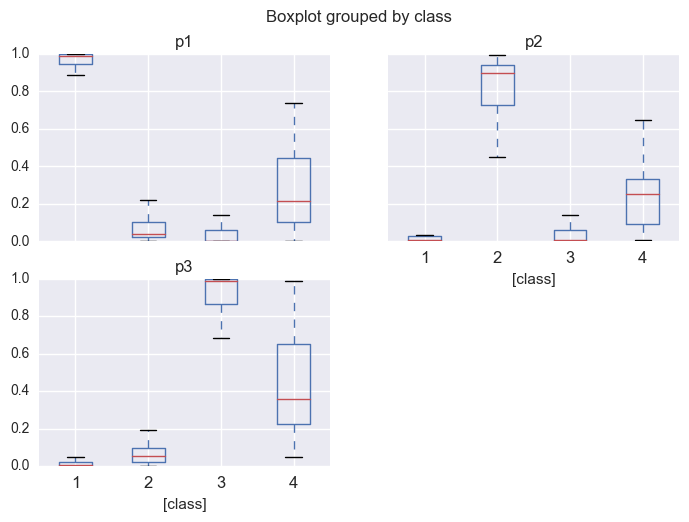

In [99]:
#make graph to visualize
pred2.boxplot(column=['p1','p2','p3'],by=['class'])

In [100]:
#classify with new method and run clsr
def assignclass(c):
    if c['p1'] >= 0.8:
        return '1'
    elif c['p2'] >= 0.74:
        return '2'
    elif c['p3'] >= 0.8:
        return '3'
    else:
        return '4'
    
pred2['predclass'] = pred2.apply(assignclass, axis=1)

In [101]:
pred2.head()

p1        p2        p3 class predclass
818   0.025336  0.971857  0.002807     2         2
1088  0.999359  0.000330  0.000311     1         1
695   0.068437  0.616021  0.315542     3         4
1100  0.966150  0.025145  0.008705     1         1
745   0.000565  0.001348  0.998087     3         3

In [102]:
print confusion_matrix(pred2['class'],pred2['predclass'])
print clsr(pred2['class'],pred2['predclass'])

[[66  0  0  4]
 [ 0 56  1 19]
 [ 0  1 58 14]
 [ 0  1  4 14]]
             precision    recall  f1-score   support

          1       1.00      0.94      0.97        70
          2       0.97      0.74      0.84        76
          3       0.92      0.79      0.85        73
          4       0.27      0.74      0.40        19

avg / total       0.91      0.82      0.85       238

